<a href="https://colab.research.google.com/github/andra2602/Music-Recommendation-System-History/blob/main/KaggleProiectAMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETAPA 0 - SETUP SI PREPROCESARE
- Ideea generală: Această etapă reprezintă procesul de pregătire a datelor și al mediului de lucru, esențial pentru orice sistem de recomandare. Obiectivul este colectarea, curățarea și structurarea datelor astfel încât modelele ulterioare (content-based sau collaborative) să funcționeze corect. Practic, în această fază sistemul își organizează datele înainte de a învăța preferințele utilizatorilor.

- Pași principali:

  - Colectarea datelor: extragerea melodiilor, metadatelor (gen, artist, an, popularitate) și istoricului de ascultare.

  - Curățarea datelor: eliminarea valorilor lipsă, a înregistrărilor duplicate și corectarea erorilor.

  - Normalizarea și vectorizarea: transformarea textelor, etichetelor și atributelor numerice în reprezentări matematice (vectori, matrici, embeddings).

  - Împărțirea datelor: separarea în seturi de antrenare și testare, necesare pentru evaluarea performanței modelelor.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


## Upload la fisier cu dataset KAGGLE


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving spotify_songs.csv to spotify_songs (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("spotify_songs.csv")
print(df.shape)
df.tail(20)

(32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.3910,127.906,204609
32814,7eVZbb7YlUopOeuiyRcJ7Z,Heartbeat (feat. Collin McLoughlin),Vicetone,1,6BVBm72Q7gLZUEm1fyoBB7,Monstercat 012 - Aftermath,2013-03-11,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,11,-4.069,0,0.0762,0.035000,0.000002,0.4600,0.2170,127.996,393750
32815,6h9xi8i9zVOXk5FqGqcBNH,We Own The Night - The Chainsmokers Edit,The Wanted,39,2wtNwzvBanX2qlunqJav1p,We Own The Night,2013-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,8,-3.561,0,0.0389,0.014100,0.008300,0.0897,0.4020,126.001,228987
32816,5dpKnqLjEbInIS8aEvInpQ,Dear Life - Original Mix,Dannic,27,35W2X8jv3n53ZPrDONQPBF,Dear Life,2014-04-14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.456,0,0.2830,0.007130,0.037200,0.4070,0.3630,127.988,337500
32817,2OgOeXUb4bIXE4vGDVDaRO,EIFORYA,Armin van Buuren,33,40IMv2dwOU1C6ZSuuolZzk,EIFORYA,2014-04-14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-6.137,0,0.0951,0.072000,0.506000,0.1430,0.1620,132.048,161779
32818,3tBHQJmuE0BOKR7l4Anap5,Beam Me Up (Kill Mode) (Radio Edit),CAZZETTE,1,5ZAKzV4ZIa5Gt7z29OYHv0,Eject pt. I,2012-11-11,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-3.156,1,0.0447,0.008380,0.000003,0.0896,0.2800,125.967,203810
32819,3H585qZxWJVpCIcvc0XhEP,Dawn - Hardwell Edit,Michael Brun,10,0utUWvjdQJMf0EFQCnaxml,Dawn,2012-01-02,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-6.664,1,0.0621,0.000502,0.932000,0.0679,0.3390,127.985,377930
32820,4BwaVpGVeCBh8qeQ1hk2my,Leaving You - Thomas Newson Radio Edit,Audien,16,06wngxHMJd8kIjtAwcxFkh,Leaving You (Remixes - Part 1),2013-10-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.037,0,0.0634,0.047000,0.006800,0.1830,0.6870,127.940,187500
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.3420,127.979,331000
32822,00UpV14MDfk4CvrMbFvqji,It Won't Stop (feat. Chris Brown) - Julian Cal...,Sevyn Streeter,0,52FeJmVsUJfoQybiwI5j9m,Atlantic Records Miami 2014,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-5.525,0,0.0478,0.009390,0.003050,0.1150,0.2160,128.025,298125


## Curățare, minimizare & normalizare dataset


In [ ]:
cols = [
    'track_name', 'track_artist', 'playlist_genre',
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'liveness', 'speechiness'
]

df = df[cols].dropna().drop_duplicates()
print(" Dimensiune după curățare:", df.shape)
df.head()


 Dimensiune după curățare: (29865, 10)


,track_name,track_artist,playlist_genre,danceability,energy,valence,tempo,acousticness,liveness,speechiness
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,pop,0.748,0.916,0.518,122.036,0.1020,0.0653,0.0583
1,Memories - Dillon Francis Remix,Maroon 5,pop,0.726,0.815,0.693,99.972,0.0724,0.3570,0.0373
2,All the Time - Don Diablo Remix,Zara Larsson,pop,0.675,0.931,0.613,124.008,0.0794,0.1100,0.0742
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,pop,0.718,0.930,0.277,121.956,0.0287,0.2040,0.1020
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,pop,0.650,0.833,0.725,123.976,0.0803,0.0833,0.0359


In [ ]:
df_subset = df.sample(n=5000, random_state=42)
print(" Am selectat un subset de", df_subset.shape[0], "melodii.")


 Am selectat un subset de 5000 melodii.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = [
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'liveness', 'speechiness'
]
scaler = MinMaxScaler()
X = scaler.fit_transform(df_subset[feature_cols])

print(" Normalizare completă:", X.shape)


 Normalizare completă: (5000, 7)


### Crearea vectorului de atribute pentru fiecare melodie


In [ ]:
# am reintrodus coloanele normalizate in vectorii de atribute
for i, col in enumerate(feature_cols):
    df_subset[f"{col}_scaled"] = X[:, i]

df_subset.head()


,track_name,track_artist,playlist_genre,danceability,energy,valence,tempo,acousticness,liveness,speechiness,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,acousticness_scaled,liveness_scaled,speechiness_scaled
15006,Cryin',Vixen,rock,0.657,0.567,0.563,109.007,0.14600,0.0554,0.0261,0.64369,0.563446,0.568109,0.321924,0.148524,0.041182,0.003686
28305,I'm In Love,NDR8,edm,0.595,0.925,0.450,126.048,0.00216,0.0788,0.0841,0.57487,0.924384,0.454081,0.433968,0.002196,0.065036,0.068476
27460,Lone Digger,Caravan Palace,edm,0.769,0.931,0.874,123.974,0.59800,0.1150,0.0495,0.76801,0.930434,0.881936,0.420331,0.608341,0.101937,0.029826
7860,The Booty Dub,DJ Magic Mike,rap,0.813,0.531,0.604,127.865,0.01560,0.0749,0.0815,0.81685,0.527151,0.609481,0.445914,0.015868,0.061060,0.065572
17563,Qué Voy a Hacer Con Mi Amor,Alejandro Fernandez,latin,0.536,0.457,0.499,165.693,0.38000,0.1690,0.0405,0.50938,0.452544,0.503527,0.694632,0.386571,0.156983,0.019772


### Corelația dintre atribute

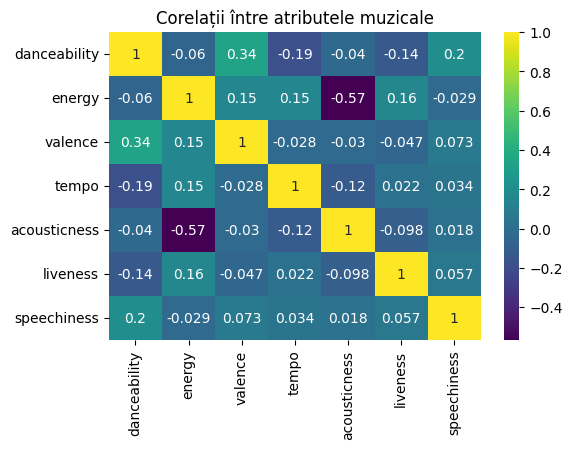

In [ ]:
plt.figure(figsize=(6,4))
# .corr() calculează coeficienții Pearson între fiecare pereche de atribute.
sns.heatmap(df_subset[feature_cols].corr(), annot=True, cmap="viridis")
plt.title("Corelații între atributele muzicale")
plt.show()

"""
Interpretare:
✔ Danceability – Valence: 0.34
Legătură slab pozitivă: → piesele dansabile tind să fie un pic mai vesele.

✔ Energy – Valence: 0.15
Legătură foarte slabă: → piesele energice nu sunt neapărat fericite.

✔ Energy – Tempo: 0.15
E corect: melodii rapide pot fi puțin mai energice, dar nu obligatoriu.

✔ Danceability – Tempo: -0.19
Valoare negativă mică: → surpriză: melodii foarte rapide nu sunt neapărat ușor de dansat.
"""
pass




# ETAPA 1 - CONTENT BASED FILTERING (EPOCA TIMPURIE)
- Ideea generală: În această etapă, sistemele de recomandare se bazau exclusiv pe caracteristicile intrinseci ale conținutului și pe preferințele explicite ale utilizatorului. Dacă un utilizator apreciază o anumită piesă, sistemul identifică alte elemente cu proprietăți similare — precum genul muzical, artistul, tempo-ul, versurile sau instrumentația. Recomandările sunt generate strict pe baza descrierii itemului, nu pe comportamentul altor utilizatori.

- Modele utilizate:

  - Analiza similarității (ex.: cosine similarity, TF-IDF etc.) — compară atributele conținutului pentru a identifica elemente asemănătoare.

  - Profilul utilizatorului — sistemul construiește un profil bazat pe piesele ascultate anterior și îl folosește pentru a selecta conținut apropiat ca stil și caracteristici.

- Context istoric: Perioada acoperă anii ’90 – începutul anilor 2000, când sistemele de recomandare erau relativ simple, bazate predominant pe metadate și conținut explicit. Reprezintă primele încercări de automatizare a preferințelor utilizatorilor prin analiza textului, a genului muzical sau a descrierilor — într-o etapă în care componenta socială sau colaborativă lipsea și avea să se dezvolte ulterior prin Collaborative Filtering.

## 1.1 Importuri



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 1.2 Matricea de similaritate
- În această etapă am construit matricea de similaritate dintre melodii utilizând metoda Cosine Similarity.

- Această măsură calculează unghiul dintre vectorii de atribute muzicale (danceability, energy, valence, tempo,
acousticness, liveness, speechiness) și indică nivelul de apropiere dintre piesele analizate din punct de vedere al „profilului” lor sonor, independent de magnitudinea valorilor.

- O valoare apropiată de 1 semnifică un grad ridicat de similaritate între melodii (stil apropiat), în timp ce o valoare apropiată de 0 evidențiază diferențe semnificative în caracteristicile audio.

In [ ]:
# rulat anterior:
# feature_cols = ['danceability', 'energy', 'valence', 'tempo']
# X = scaler.fit_transform(df_subset[feature_cols])

X_scaled = X
sim_matrix = cosine_similarity(X_scaled)
print(" Matricea de similaritate:", sim_matrix.shape)


 Matricea de similaritate: (5000, 5000)


###1.2.1 Compararea metricilor de similaritate – Cosine, Euclidean și Manhattan

- Am analizat trei metode de măsurare a similarității dintre melodii: Cosine Similarity, distanța Euclideană și distanța Manhattan.

  - Cosine Similarity oferă cele mai stabile și relevante rezultate pentru date muzicale normalizate, deoarece evaluează unghiul dintre vectorii de atribute și surprinde fidel asemănările de „profil sonor”(combinația celor 4 atribute).

  - În schimb, distanțele Euclideană și Manhattan se bazează pe diferențe absolute între valori și pot altera percepția similarității atunci când atributele au variații de scară sau distribuții diferite.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import pandas as pd

# Euclidean distance – o transformăm în similaritate (small distance = high similarity)
dist_euc = euclidean_distances(X_scaled)
sim_euc = 1 / (1 + dist_euc)

# Manhattan distance – la fel o convertim
dist_man = manhattan_distances(X_scaled)
sim_man = 1 / (1 + dist_man)

# -----------------------------------------------------------------------------------
sample_idx = [0, 1, 2]  # primele 3 melodii

sample_info = (
    df_subset[['track_name', 'track_artist', 'playlist_genre']]
    .iloc[sample_idx]
    .apply(lambda row: f"{row['track_name']} — {row['track_artist']} — {row['playlist_genre']}", axis=1)
    .values
)

print("Cele 3 melodii folosite:\n")
for info in sample_info:
    print("-", info)

# Construim tabelele
small_cos = pd.DataFrame(sim_matrix[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

small_euc = pd.DataFrame(sim_euc[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

small_man = pd.DataFrame(sim_man[sample_idx][:, sample_idx],
                         index=sample_names, columns=sample_names)

print("\nCOSINE SIMILARITY (3 melodii):")
display(small_cos)

print("\nEUCLIDEAN SIMILARITY (3 melodii):")
display(small_euc)

print("\nMANHATTAN SIMILARITY (3 melodii):")
display(small_man)

Cele 3 melodii folosite:

- Cryin' — Vixen — rock
- I'm In Love — NDR8 — edm
- Lone Digger — Caravan Palace — edm

COSINE SIMILARITY (3 melodii):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.942793,0.963234
I'm In Love,0.942793,1.000000,0.899699
Lone Digger,0.963234,0.899699,1.000000



EUCLIDEAN SIMILARITY (3 melodii):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.698255,0.592221
I'm In Love,0.698255,1.000000,0.565397
Lone Digger,0.592221,0.565397,1.000000



MANHATTAN SIMILARITY (3 melodii):


,Cryin',I'm In Love,Lone Digger
Cryin',1.000000,0.528877,0.408121
I'm In Love,0.528877,1.000000,0.430593
Lone Digger,0.408121,0.430593,1.000000


## 1.3 Funcția de recomandare bazată pe conținut

Funcția recommend_content_based() utilizează matricea de similaritate pentru a identifica cele mai apropiate melodii față de o piesă dată. Utilizatorul poate introduce numele melodiei chiar și parțial, iar funcția caută cea mai bună potrivire în subsetul curent (df_subset).

- Pașii realizați:

1. Căutarea melodiei în subset, acceptând potriviri parțiale ale titlului introdus.

2. Localizarea indexului melodiei în DataFrame și extragerea rândului corespunzător din matricea de similaritate.

3. Sortarea scorurilor de similaritate și selectarea celor mai apropiate N melodii (cu excluderea piesei inițiale).

4. Construirea unui DataFrame de rezultate care include titlul, artistul, genul și scorul de similaritate.

5. Afișarea recomandărilor într-un format clar și interpretabil.

Această funcție reprezintă componenta centrală a modulului de Content-Based Filtering: ea recomandă melodii cu un profil acustic asemănător, pe baza atributelor selectate (danceability, energy, valence și tempo).

In [ ]:
def recommend_content_based_table(song_name, similarity_matrix, top_n=5):
    # căutare melodie (match parțial)
    matches = df_subset[df_subset['track_name'].str.contains(song_name, case=False, na=False)]
    if matches.empty:
        return None  # sau poți returna un DataFrame gol

    # poziția în subset
    idx_local = matches.index[0]
    idx_pos = df_subset.index.get_loc(idx_local)

    # similaritățile pentru melodia selectată
    sim_scores = similarity_matrix[idx_pos]

    # top N melodii
    similar_indices = sim_scores.argsort()[::-1][1:top_n+1]

    # tabelul final
    recs = df_subset.iloc[similar_indices][
        ['track_name', 'track_artist', 'playlist_genre']
    ].copy()

    recs['similarity'] = sim_scores[similar_indices]
    recs['similarity'] = recs['similarity'].apply(lambda x: round(float(x), 3))

    return recs


- Am creat o funcție auxiliară pentru a compara recomandările generate de cele
3 metrici de similaritate diferite: Cosine, Euclidean și Manhattan.

- Funcția afișează pentru aceeași melodie cele mai apropiate rezultate din
fiecare model, permițând analizarea diferențelor și justificarea alegerii
Cosine Similarity drept metodă principală.


In [ ]:
def compare_similarity_tables(song_name, top_n=5):
    out = {}

    out['Cosine Similarity'] = recommend_content_based_table(song_name, sim_matrix, top_n)
    out['Euclidean Similarity'] = recommend_content_based_table(song_name, sim_euc, top_n)
    out['Manhattan Similarity'] = recommend_content_based_table(song_name, sim_man, top_n)

    return out


In [ ]:
df_subset['track_name'].sample(20).values

array(['Put On', 'Fantasmita - Remix', 'Giulia', 'Love Yuh Everything',
       'Nice To Meet Ya', 'My Foolish Heart', "Mary Don't Mind",
       'Donde Estas Corazon', 'Fall Hard', 'Our Darkness', 'Déjame Volar',
       'Laith', 'Better Now', 'You Know How We Do It - Remastered',
       'Twerk (con Boro Boro)', 'Wannajuato', 'Hey', 'We Found Love',
       'shorty (pt.3)', 'Express Your Feelings'], dtype=object)

In [ ]:
results = compare_similarity_tables("Friends", 10)

from IPython.display import HTML

tables_html = """
<div style="
    display: flex;
    flex-direction: row;
    justify-content: space-between;
    width: 100%;
">
"""

for metric, table in results.items():
    tables_html += f"""
        <div style="
            width: 32%;
            margin-right: 10px;
            border: 1px solid #444;
            padding: 10px;
            box-sizing: border-box;
        ">
            <h3 style="text-align:center;">{metric}</h3>
            {table.to_html(index=False)}
        </div>
    """

tables_html += "</div>"

HTML(tables_html)


track_name,track_artist,playlist_genre,similarity
The Journey,Tom Misch,pop,0.995
I Swear,All-4-One,r&b,0.994
Out of the Blue - 2014 Remastered Version,Michael Learns To Rock,rock,0.992
Hasta Morir,Caifanes,rock,0.991
It's You,Ali Gatie,latin,0.990
Smoking Section,Jelly Roll,rap,0.990
SOS (feat. Aloe Blacc),Avicii,r&b,0.990
I Got This Record,Jwonn,rap,0.990
Na Na Na,Now United,latin,0.989
Tranki,Diamond la Mafia,latin,0.989


## 1.4 Vizualizarea melodiilor cu PCA


- PCA (Principal Component Analysis) este o metodă de reducere a dimensionalității care transformă un set de variabile numerice corelate (cum sunt danceability, energy, valence, tempo, etc) într-un spațiu nou, cu componente principale necorelate.

- În acest caz, PCA a fost folosit pentru a proiecta melodiile într-un spațiu bidimensional, astfel încât să putem vizualiza distribuția lor în funcție de gen.

- Punctele apropiate pe grafic corespund melodiilor cu profiluri muzicale similare, iar grupurile de culori indică asemănări între genurile muzicale din perspectiva caracteristicilor numerice.

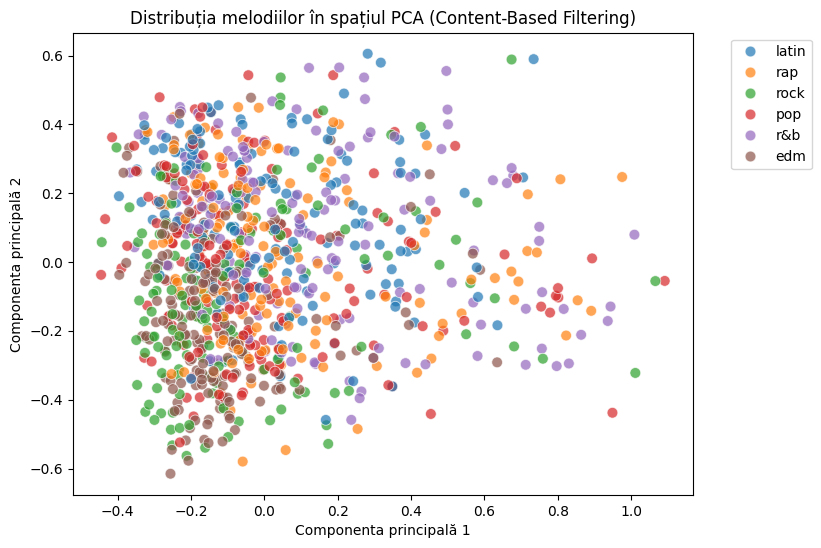

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_viz = df_subset.copy()
df_viz['pca1'] = X_pca[:, 0]
df_viz['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz.sample(1000), x='pca1', y='pca2',
                hue='playlist_genre', alpha=0.7, s=60)
plt.title("Distribuția melodiilor în spațiul PCA (Content-Based Filtering)")
plt.xlabel("Componenta principală 1")
plt.ylabel("Componenta principală 2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 1.5 Analiză lingvistică a titlurilor (Word Cloud per gen)

În această etapă am analizat titlurile melodiilor pentru fiecare gen muzical, aplicând un proces de curățare a textului care a inclus:

- eliminarea caracterelor speciale, cifrelor și parantezelor;

- transformarea textului la litere mici;

- filtrarea stopwords standard (ex.: the, and, a);

- eliminarea stopwords specifice industriei muzicale (feat, remix, edit, version, official etc.).

Pentru fiecare gen am construit un corpus separat, apoi am generat câte un Word Cloud care evidențiază vizual cele mai frecvente cuvinte din titlurile melodiilor acelui gen.

Rezultatele reflectă teme recurente distincte pentru fiecare categorie muzicală:

- Rap → money, day, back (teme legate de viața cotidiană, atitudine, experiențe personale)

- Pop → love, girl, stay (tematici romantice, emoționale)

- Latin → amor, solo, noche (teme pasionale, titluri în spaniolă)

- EDM → love, night, let (vibe energetic, atmosferă de party)

- Rock → man, dream, light (teme introspective, narative)

Word Cloud-urile oferă o perspectivă vizuală rapidă asupra identității fiecărui gen și completează analiza PCA realizată anterior, confirmând diferențele tematice dintre genuri atât la nivel acustic, cât și la nivel lexical.

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [ ]:
from wordcloud import STOPWORDS as WC_STOPWORDS
import re

# stopwords personalizate
CUSTOM_STOPWORDS = {
    "feat", "ft", "featuring",
    "remix", "mix", "version", "edit", "radio",
    "original", "single", "remastered", "club", "remaster",
    "que", "live", "acoustic"
}

# combinăm standard + personalizate
ALL_STOPWORDS = set(WC_STOPWORDS) | CUSTOM_STOPWORDS


def clean_words_from_title(title):
    """
    Transformă un titlu de melodie într-o listă de cuvinte curate.
    """
    # eliminăm parantezele (ex: "Song (feat. X)" → "Song ")
    title = re.sub(r"\(.*?\)", "", title)

    words = title.split()
    cleaned = []

    for w in words:
        w = w.lower()
        w = re.sub(r'[^a-z0-9]+', '', w)   # păstrăm doar litere/cifre

        if not w:
            continue

        if len(w) <= 2:
            continue

        if w in ALL_STOPWORDS:
            continue

        cleaned.append(w)

    return cleaned


In [ ]:
# Selectăm genurile care apar de cel puțin 50 de ori
genre_counts = df_subset['playlist_genre'].value_counts()
top_genres = genre_counts[genre_counts >= 50].index.tolist()

print("Genuri selectate pentru Word Cloud:", top_genres)

Genuri selectate pentru Word Cloud: ['rap', 'edm', 'r&b', 'pop', 'latin', 'rock']


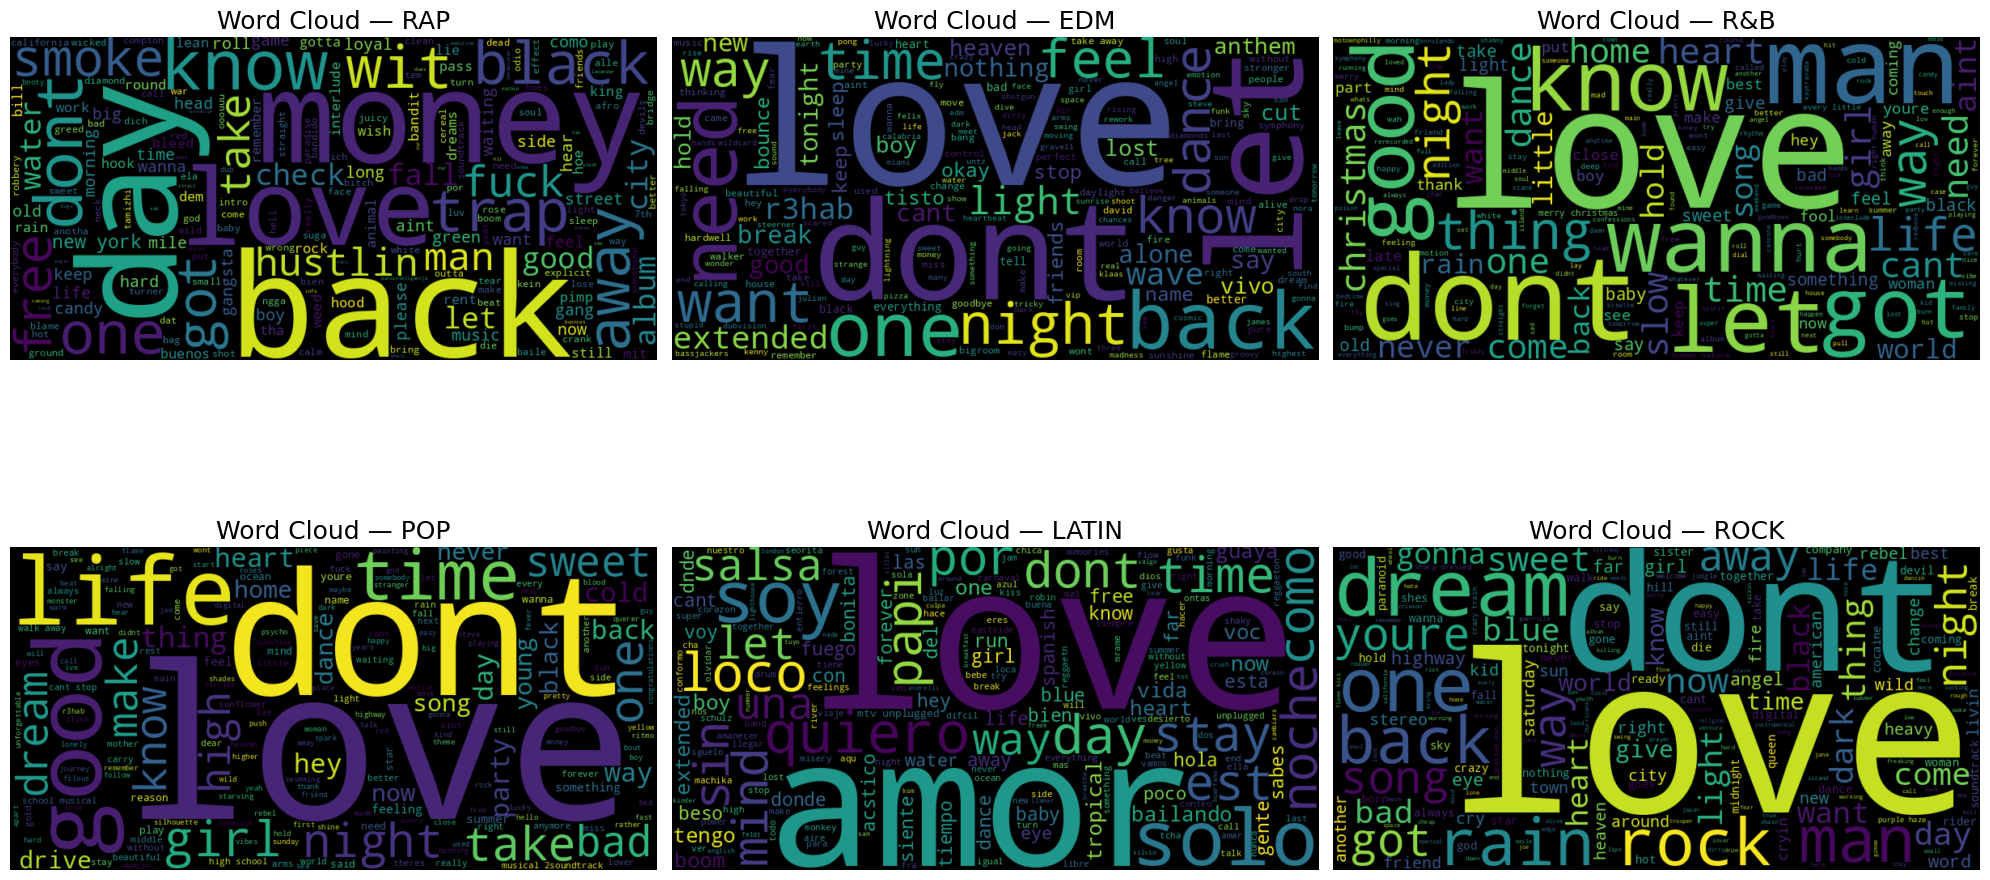

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, genre in enumerate(top_genres):

    # selectăm titlurile
    titles = df_subset[df_subset['playlist_genre'] == genre]['track_name']

    # curățăm titlurile
    cleaned_words = []
    for title in titles:
        cleaned_words.extend(clean_words_from_title(title))

    # dacă genul nu are cuvinte valide, îl sărim
    if len(cleaned_words) == 0:
        axes[i].text(0.5, 0.5, f"No valid words for {genre}", ha='center')
        axes[i].axis('off')
        continue

    # construim text curat
    text = " ".join(cleaned_words)

    # generăm world cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="black",
        colormap="viridis"
    ).generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud — {genre.upper()}", fontsize=18)
    axes[i].axis('off')

# dezactivăm subploturi goale dacă sunt mai puțin de 6 genuri
for j in range(len(top_genres), 6):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

În această secțiune am completat analiza Word Cloud printr-o abordare cantitativă, urmărind identificarea celor mai frecvente 10 cuvinte din titlurile melodiilor pentru fiecare gen muzical.

Pentru fiecare gen am realizat următorii pași:

- Am extras toate titlurile disponibile din subset.

- Le-am preprocesat folosind aceeași funcție de curățare a textului (stopwords standard + stopwords personalizate).

- Am calculat frecvența fiecărui cuvânt utilizând Counter.

- Am generat un grafic de tip bar chart care evidențiază top 10 cuvinte dominante.

Această analiză oferă o perspectivă numerică asupra temelor recurente din fiecare gen muzical și validează observațiile vizuale obținute din Word Cloud-uri.

In [ ]:
genre_word_freq = {}

for genre in top_genres:
    titles = df_subset[df_subset['playlist_genre'] == genre]['track_name']

    cleaned_words = []
    for title in titles:
        cleaned_words.extend(clean_words_from_title(title))

    freq = Counter(cleaned_words).most_common(10)  # top 10 cuvinte
    genre_word_freq[genre] = freq


/tmp/ipython-input-530132660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45, ha='right')
/tmp/ipython-input-530132660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45, ha='right')
/tmp/ipython-input-530132660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45, ha='right')
/tmp/ipython-input-530132660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45, ha='right')
/tmp/ipython-input-530132660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of tic

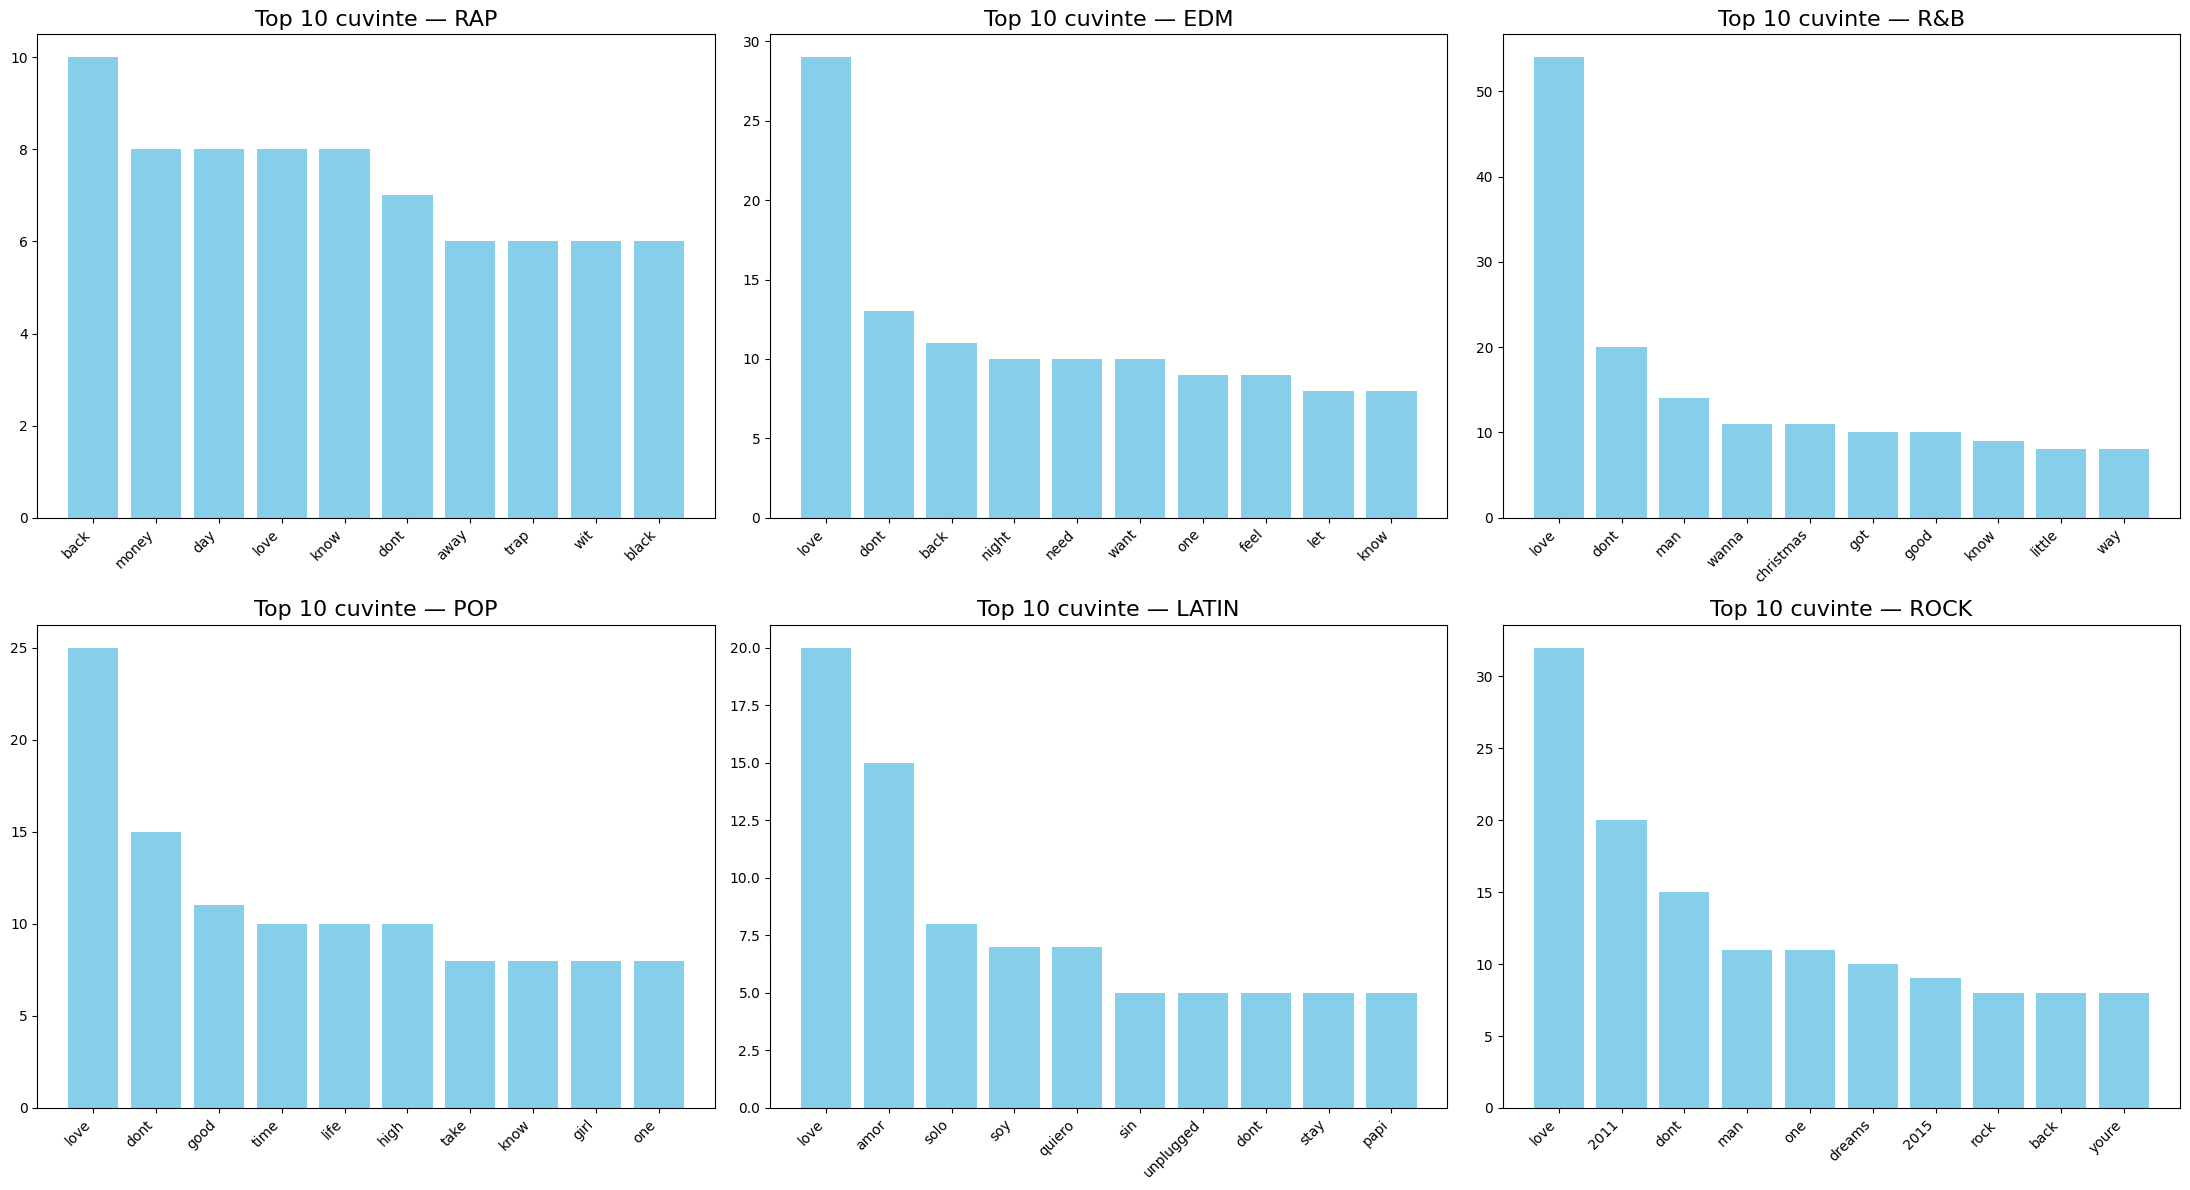

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
axes = axes.flatten()

for i, genre in enumerate(top_genres):
    freq = genre_word_freq[genre]

    if len(freq) == 0:
        axes[i].text(0.5, 0.5, "No valid words", ha="center")
        axes[i].axis("off")
        continue

    words = [w for w, _ in freq]
    counts = [c for _, c in freq]

    axes[i].bar(words, counts, color="skyblue")
    axes[i].set_title(f"Top 10 cuvinte — {genre.upper()}", fontsize=16)
    axes[i].set_xticklabels(words, rotation=45, ha='right')
    axes[i].tick_params(axis='x', labelsize=10)

# umplem subploturile goale dacă avem sub 6 genuri
for j in range(len(top_genres), 6):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# ETAPA 2 - COLLABORATIVE FILTERING (EPOCA STATISTICĂ)

- Ideea centrală: În această etapă, sistemul de recomandare nu se mai bazează exclusiv pe caracteristicile melodiilor, ci învață din comportamentele colective ale utilizatorilor. Dacă doi utilizatori prezintă preferințe similare (de exemplu, ascultă aceleași piese), atunci sistemul poate recomanda fiecăruia melodii pe care nu le-a ascultat încă, dar pe care ceilalți utilizatori cu gusturi similare le apreciază.

- Modele utilizate:
  1. User–Item Filtering (Co-Ascultări) – se bazează pe ideea că „utilizatorii asemănători tind să aprecieze aceleași melodii”: dacă alți utilizatori care au ascultat piesa X au ascultat și piesa Y, aceasta poate fi recomandată.

  2. SVD (Matrix Factorization) – descompune matricea user–item și extrage factori latenți care modelează gusturile ascunse ale utilizatorilor.

  
- Context istoric: Această etapă corespunde anilor 2000, odată cu apariția platformelor precum Netflix și Amazon, când metodele de recomandare bazate pe modele statistice și pe date colective au început să depășească abordările bazate strict pe conținut.

## 2.1 Simulare date de ascultări / ratinguri

- Generăm un set sintetic de utilizatori, melodii și ratinguri (între 1 și 5), folosind melodiile din subsetul df_subset.

In [ ]:
import pandas as pd
import numpy as np

# simulăm 200 de utilizatori și 500 de melodii
num_users = 200
num_songs = 500

# selectăm 500 de melodii din subset, adăugăm un "song_id"
songs_sample = df_subset.sample(num_songs, random_state=42).reset_index(drop=True)
songs_sample['song_id'] = songs_sample.index   # ESENȚIAL

# extragem lista de genuri
genres = songs_sample['playlist_genre'].unique()

# ---------------------------------------------------
# CREĂM PROFILUL FIECĂRUI USER (gen favorit + gen urât)
# ---------------------------------------------------
user_profiles = []
for uid in range(1, num_users + 1):
    fav = np.random.choice(genres)
    hate = np.random.choice([g for g in genres if g != fav])
    user_profiles.append((uid, fav, hate))

user_profiles = pd.DataFrame(user_profiles,
                             columns=['user_id', 'fav_genre', 'hate_genre'])

# ---------------------------------------------------
# GENERĂM RATINGURI ÎN FUNCȚIE DE PREFERINȚE
# ---------------------------------------------------
rows = []

for _, user in user_profiles.iterrows():
    for _, song in songs_sample.iterrows():

        # Probabilitatea ca userul să fi ascultat melodia
        if np.random.rand() > 0.35:
            continue

        genre = song['playlist_genre']

        # setăm media ratingului în funcție de gen
        if genre == user['fav_genre']:
            mu = 4.5
        elif genre == user['hate_genre']:
            mu = 2.0
        else:
            mu = 3.0

        # distribuție realistă (normală)
        rating = np.clip(np.random.normal(mu, 0.7), 1, 5)

        rows.append((user['user_id'], song['song_id'], round(rating)))

# ratings_df final
ratings_df = pd.DataFrame(rows, columns=['user_id', 'song_id', 'rating'])

# ---------------------------------------------------
# ADAUGĂM TITLUL MELODIEI PENTRU LIZIBILITATE (opțional)
# ---------------------------------------------------
ratings_df = ratings_df.merge(
    songs_sample[['song_id', 'track_name']],
    on='song_id',
    how='left'
)

print("Set de ascultări simulat:", ratings_df.shape)
ratings_df.head()


Set de ascultări simulat: (35155, 4)


,user_id,song_id,rating,track_name
0,1,1,3,Jump - Remastered Version
1,1,4,4,Being Alive
2,1,5,2,Un Veneno
3,1,6,4,Lake Of Fire
4,1,8,3,Stairway to Heaven - Remaster


## 2.2 Model de filtrare colaborativă – SVD (Matrix Factorization)

În această etapă construim un sistem de recomandare colaborativ bazat pe factorizarea matricei user–item folosind SVD.
Pentru a obține rezultate cât mai realiste, folosim:

- centrare pe utilizator (Netflix Prize trick)

- reducere de dimensionalitate (SVD trunchiat)

- reconstruirea ratingurilor lipsă pe baza factorilor latenți

- recomandări personalizate pentru fiecare utilizator

### De ce centrăm ratingurile?
Utilizatorii nu folosesc aceeași scară (unii sunt “generoși”, alții foarte critici).

Pentru a elimina acest bias, scădem media fiecărui utilizator. Astfel SVD învață preferințele reale, nu stilul personal de notare.

In [ ]:
# ============================================
# 1. CENTRARE PE USER – Netflix Prize Trick
# ============================================

import numpy as np
import pandas as pd

# media fiecărui utilizator
user_means = ratings_df.groupby('user_id')['rating'].mean()

# rating centrat = rating - media utilizatorului
ratings_df_centered = ratings_df.copy()
ratings_df_centered['rating_centered'] = ratings_df_centered.apply(
    lambda r: r['rating'] - user_means[r['user_id']],
    axis=1
)

ratings_df_centered.head()


,user_id,song_id,rating,track_name,rating_centered
0,1,1,3,Jump - Remastered Version,-0.092391
1,1,4,4,Being Alive,0.907609
2,1,5,2,Un Veneno,-1.092391
3,1,6,4,Lake Of Fire,0.907609
4,1,8,3,Stairway to Heaven - Remaster,-0.092391


### De ce folosim matricea centrată pentru SVD?
Prin centrare:

- valorile pozitive înseamnă “peste media mea”

- valorile negative înseamnă “sub media mea”

- zero = necunoscut sau exact media

SVD funcționează optim când datele sunt centrate.

In [ ]:
# ============================================
# 2. CONSTRUIM MATRICEA USER–ITEM CENTRATĂ
# ============================================

user_item_matrix = ratings_df_centered.pivot_table(
    index="user_id",
    columns="song_id",
    values="rating_centered",
).fillna(0)

R = user_item_matrix.values

user_item_matrix.head()


song_id,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,-0.092391,0.000000,0.000000,0.907609,-1.092391,0.907609,0.000000,-0.092391,0.000000,...,0.000000,0.0,0.000000,0.000000,1.907609,0.000000,1.907609,0.000000,-0.092391,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122995,0.000000,0.877005,...,-1.122995,0.0,0.000000,0.000000,0.000000,1.877005,-0.122995,0.000000,1.877005,0.0
3,-1.092391,0.000000,-0.092391,-0.092391,0.000000,0.000000,0.000000,0.000000,0.000000,-1.092391,...,0.000000,0.0,1.907609,0.000000,0.000000,0.000000,0.000000,0.000000,0.907609,0.0
4,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0
5,0.732558,0.732558,0.000000,0.000000,-0.267442,0.000000,0.000000,0.000000,-0.267442,0.732558,...,0.000000,0.0,0.000000,-1.267442,0.732558,0.000000,0.732558,-0.267442,-0.267442,0.0


### Ce face SVD aici?

1. Descompune matricea în factori latenți (gusturi ascunse ale userilor + caracteristicile ascunse ale melodiilor).

2. Reconstruiește ratingurile lipsă.

3. Adăugăm media utilizatorului la final → revenim la scara 1–5.

Limităm scorurile la max 5 pentru interpretare corectă.

In [ ]:
# ============================================
# 3. SVD TRUNCHIAT + RECONSTRUCȚIE
# ============================================

U, sigma, Vt = np.linalg.svd(R, full_matrices=False)

k = 25  # numărul de factori latenți
sigma_k = np.diag(sigma[:k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]

# Matrice prezisă în sistem centrat
R_pred_centered = U_k @ sigma_k @ Vt_k

# Revenim la scara 1–5 adăugând media utilizatorilor
R_pred = R_pred_centered + user_means.values[:, None]

R_pred[:5, :5]


array([[3.27128374, 2.67930139, 2.92751174, 3.00888889, 3.30131952],
       [3.51136723, 2.83954525, 3.60486041, 3.5219696 , 3.09659263],
       [2.57775967, 3.81092397, 2.89576886, 3.09909866, 3.00835542],
       [2.0385353 , 3.10174459, 3.17653915, 2.73374179, 2.76189541],
       [3.46400296, 3.07600866, 3.0782757 , 3.08339439, 3.46241914]])

## 2.3 Recomandări pentru un utilizator

- Recomandăm top-N melodii unui utilizator pe baza scorurilor prezise de model.

In [ ]:
# ============================================
# FUNCȚIA FINALĂ DE RECOMANDARE SMART
# ============================================

def recommend_for_user_smart(user_id, top_n=10):

    if user_id not in user_item_matrix.index:
        print(f"Userul {user_id} nu există în matrice.")
        return

    user_index = user_item_matrix.index.get_loc(user_id)
    scores = R_pred[user_index]

    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    rated_song_ids = set(user_ratings['song_id'])

    sorted_idx = np.argsort(scores)[::-1]

    recommendations = []
    for pos in sorted_idx:
        song_id = user_item_matrix.columns[pos]
        if song_id not in rated_song_ids:
            score = float(min(scores[pos], 5))  # limitare la 5
            recommendations.append((song_id, score))
        if len(recommendations) == top_n:
            break

    # melodii ascultate
    listened_df = (
        songs_sample.loc[user_ratings['song_id']][['track_name','track_artist','playlist_genre']]
        .copy()
    )
    listened_df['rating'] = user_ratings.set_index('song_id')['rating']

    # recomandări noi
    rec_song_ids = [s[0] for s in recommendations]
    rec_scores = [s[1] for s in recommendations]

    recom_df = (
        songs_sample.loc[rec_song_ids][['track_name','track_artist','playlist_genre']]
        .copy()
    )
    recom_df['predicted_score'] = rec_scores

    print(f"\n=== Recomandări SMART-SVD pentru user_id = {user_id} ===\n")
    print("Melodii deja ascultate (cu rating):")
    display(listened_df)

    print("\nRecomandări SVD (melodii noi):")
    display(recom_df)

    return None


In [ ]:
# =======================================================
# EXEMPLU DE TEST
# =======================================================
recommend_for_user_smart(15, top_n=10)




=== Recomandări SMART-SVD pentru user_id = 15 ===

Melodii deja ascultate (cu rating):


,track_name,track_artist,playlist_genre,rating
2,Only God Can Judge Me,2Pac,rap,2
3,Insta,Bizzey,latin,2
4,Being Alive,Hardwell,edm,4
7,Dance?,Night Tempo,r&b,1
11,Idealne Połączenie,Young Igi,rap,2
...,...,...,...,...
492,In My Mind,The Amazons,rock,5
493,Extraños En El Escaparate - Live,Miguel Rios,rock,4
495,Sparkles,Daxten,latin,2
496,Reflections,Jean Juan,edm,4



Recomandări SVD (melodii noi):


,track_name,track_artist,playlist_genre,predicted_score
107,Wrong Way,Sublime,rock,4.295300
241,Sofia,Alvaro Soler,latin,4.109802
96,Lovesong,The Cure,rock,3.986341
370,The Dark,John Clark,rock,3.898507
391,Here I Go Again 87 - 2017 Remastered Version,Whitesnake,rock,3.874134
487,White Flag,Dido,rock,3.792521
90,(Don't Fear) The Reaper,Blue Öyster Cult,rock,3.768494
94,Bedside Radio - Remastered,Krokus,rock,3.753841
328,All In My Head,Tori Kelly,r&b,3.708414
344,The Climb,Miley Cyrus,pop,3.705294


## 2.4 Recomandări bazate pe co-ascultări (user–item logic)

În această secțiune implementăm o metodă de recomandare inspirată de comportamentul platformelor de streaming (ex. Spotify, Apple Music), bazată pe ideea:

- „Utilizatorii care au ascultat piesa X au mai ascultat și piesa Y.”

Această abordare nu folosește atributele melodiei și nici factori latenți, ci se bazează exclusiv pe intersecția preferințelor utilizatorilor. Logica este simplă și intuitivă: dacă două melodii apar frecvent împreună în istoricul multor utilizatori, atunci ele sunt probabil similare din punctul de vedere al publicului.

### 2.4.1 Conceptul metodei
Metoda de co-ascultare reprezintă o formă simplă de collaborative filtering, care:

- identifică utilizatorii care au ascultat o piesă dată,

- agregă toate piesele ascultate de acest grup,

- numără frecvența co-aparițiilor,

- recomandă piesele cel mai des co-ascultate.

Astfel, recomandările sunt determinate de comportamentul mulțimii, nu de un model matematic.


In [ ]:
def recommend_based_on_song(song_name, top_n=5):
    # găsim song_id-ul piesei
    match = songs_sample[songs_sample['track_name'].str.contains(song_name, case=False, na=False)]
    if match.empty:
        print(f"Piesa '{song_name}' nu există în setul de melodii.")
        return
    target_song_id = match.iloc[0]['song_id']

    print(f"\nPiesa căutată: {match.iloc[0]['track_name']} (song_id={target_song_id})\n")

    # utilizatorii care au ascultat piesa X
    users_who_listened = ratings_df[ratings_df['song_id'] == target_song_id]['user_id'].unique()

    # toate melodiile ascultate de acești utilizatori
    co_listens = ratings_df[ratings_df['user_id'].isin(users_who_listened)]

    # numărăm frecvența fiecărei melodii
    song_counts = co_listens['song_id'].value_counts()

    # eliminăm piesa originală
    song_counts = song_counts.drop(target_song_id, errors='ignore')

    # top N piese co-ascultate
    top_songs = song_counts.head(top_n)

    # construim tabel final
    rec_df = songs_sample.set_index('song_id').loc[top_songs.index][
        ['track_name', 'track_artist', 'playlist_genre']
    ].copy()

    rec_df['co_listen_count'] = top_songs.values

    print("Recomandări bazate pe co-ascultări:\n")
    display(rec_df)

    return


In [ ]:
songs_sample['track_name'].sample(20).values

array(['Milk Run', "All My Life I've Wanted A Chevy", 'Black Cat',
       'Large Bag', 'Piedra', 'm.A.A.d city', 'Apache - 45 Version',
       "You're Now Tuning Into 66.6 FM With DJ Rapture (The Hottest Hour Of The Evening)",
       'Beautiful Creatures (feat. MAX)', 'Looking Like This',
       'Apaga a Luz', 'All In My Head',
       'Spiritual (Mriya) [feat. Brooke Tomlinson]', 'The Legendary',
       'Aura - Edit', 'Hokusai', "What's Goin' On", 'Pegadito Suavecito',
       'Kom säger dom', 'Flashing Lights'], dtype=object)

In [ ]:
recommend_based_on_song("Freaks")


Piesa căutată: Freaks (song_id=50)

Recomandări bazate pe co-ascultări:



,track_name,track_artist,playlist_genre,co_listen_count
song_id,,,,
201,Bring Da Ruckus,Wu-Tang Clan,rap,44
107,Wrong Way,Sublime,rock,39
269,Still,Yazmin Lacey,r&b,39
157,Grenade,Bruno Mars,edm,38
111,Coming Over,Dillon Francis,pop,38


## 2.5 Analiza utilizatorilor similari (User–User Similarity)

In [ ]:

ratings_unique = (
    ratings_df
    .groupby(['user_id', 'song_id'])['rating']
    .mean()
    .reset_index()
)
pivot = ratings_unique.pivot_table(
    index='user_id',
    columns='song_id',
    values='rating',
    aggfunc='mean'
)
pivot_filled = pivot.fillna(0)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim_matrix = cosine_similarity(pivot_filled)
user_sim_df = pd.DataFrame(user_sim_matrix,
                           index=pivot_filled.index,
                           columns=pivot_filled.index)

In [ ]:
def most_similar_users(user_id, top_n=5):
    if user_id not in user_sim_df.index:
        return f"Userul {user_id} nu există în ratings_df"

    # similaritățile userului cu toți ceilalți
    sims = user_sim_df.loc[user_id]

    # sortăm descrescător (ignoram userul însuși)
    sims = sims.drop(user_id).sort_values(ascending=False)

    return sims.head(top_n)

In [ ]:
most_similar_users(15, top_n=5)

,15
user_id,
156,0.392108
85,0.388779
187,0.382837
71,0.382119
44,0.381727


Genuri detectate: {'edm': '#1f77b4', 'latin': '#ff7f0e', 'rock': '#2ca02c', 'rap': '#d62728', 'r&b': '#9467bd', 'pop': '#8c564b'}


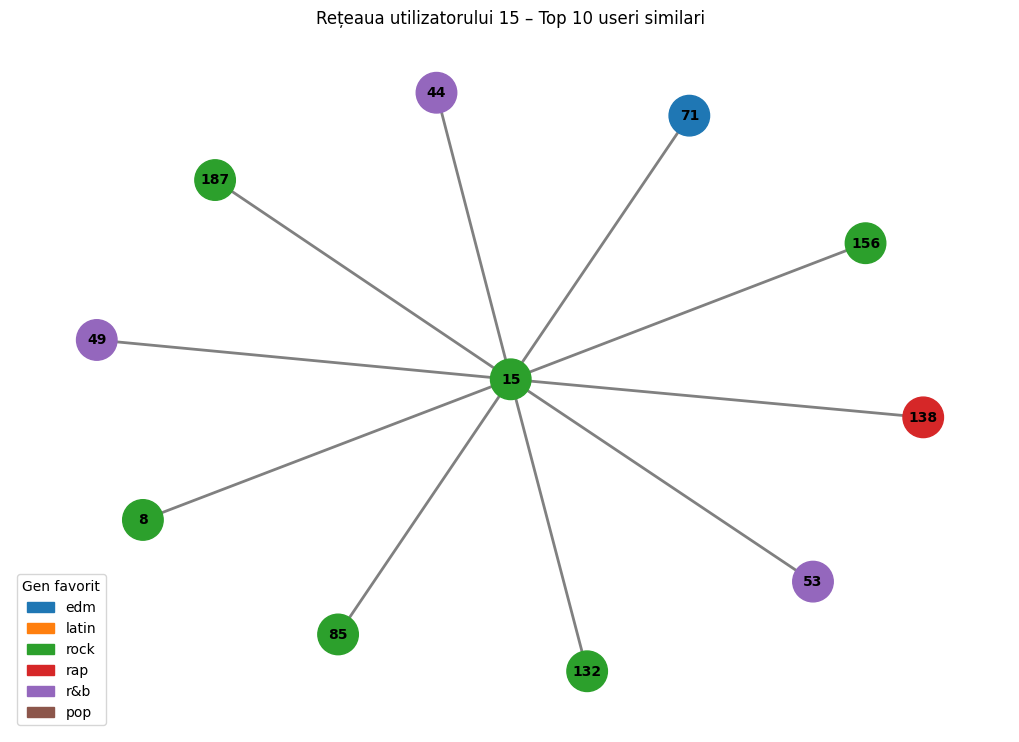

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -------------------------------------------------------------------
# 1) DEFINIM CULORILE PENTRU GENURI (AUTOMAT)
# -------------------------------------------------------------------
genres = user_profiles['fav_genre'].unique()

# paletă de culori profesionistă
palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf"
]

genre_colors = {
    genre: palette[i % len(palette)]
    for i, genre in enumerate(genres)
}

print("Genuri detectate:", genre_colors)


# -------------------------------------------------------------------
# 2) FUNCTIA COMPLETĂ – REȚEA PERSONALIZATĂ PT. UN USER
# -------------------------------------------------------------------
def plot_user_network(target_user, top_n=10):
    # 1. Luăm scorurile de similaritate pentru userul dorit
    sims = user_sim_df.loc[target_user].drop(target_user)
    top_users = sims.sort_values(ascending=False).head(top_n).index.tolist()

    # includem userul în listă
    nodes_to_plot = [target_user] + top_users

    # 2. Subsetăm profilurile
    sub_profiles = user_profiles[user_profiles['user_id'].isin(nodes_to_plot)]

    # 3. Construim graful
    G_small = nx.Graph()
    for uid in nodes_to_plot:
        G_small.add_node(uid)

    # muchii: doar între userul target și cei similari
    for uid in top_users:
        sim_value = sims[uid]
        G_small.add_edge(target_user, uid, weight=sim_value)

    # 4. Colorăm nodurile după gen
    node_colors = []
    for uid in nodes_to_plot:
        genre = sub_profiles[sub_profiles['user_id'] == uid]['fav_genre'].iloc[0]
        node_colors.append(genre_colors.get(genre, "gray"))

    # 5. Layout
    pos = nx.spring_layout(G_small, seed=42)

    # 6. Plot
    plt.figure(figsize=(10, 7))

    nx.draw(
        G_small, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=850,
        font_size=10,
        font_weight="bold",
        edge_color="gray",
        width=2
    )

    # 7. Legendă
    legend_handles = [
        mpatches.Patch(color=color, label=genre)
        for genre, color in genre_colors.items()
    ]
    plt.legend(handles=legend_handles, title="Gen favorit", loc="lower left")

    # 8. Titlu
    plt.title(f"Rețeaua utilizatorului {target_user} – Top {top_n} useri similari")
    plt.show()


# -------------------------------------------------------------------
# 3) APELARE – exemplu pentru userul 15
# -------------------------------------------------------------------
plot_user_network(15, top_n=10)


### **Experiment**: Verificăm dacă recomandările SVD pot fi explicate prin utilizatorii similari

În secțiunea 2.3 am obținut o listă de melodii recomandate folosind modelul SVD, un model bazat pe factori latenti.  
Totuși, SVD este adesea perceput ca un model tip „cutie neagră”, deoarece nu este imediat clar **de ce** o anumită melodie ajunge în recomandări.

În secțiunea 2.5 am calculat utilizatorii similari pe baza comportamentului de ascultare, folosind *cosine similarity*.  
Aici combinăm cele două metode într-un mic experiment:

- **Luăm una dintre piesele recomandate de SVD**  
- **Verificăm dacă utilizatorii similari au ascultat sau apreciat această melodie**  

Astfel putem observa dacă recomandarea SVD este justificată și de co-ascultarea utilizatorilor asemănători.  
Acest tip de explicație este folosit în platforme moderne (Spotify, YouTube, Netflix) pentru a face recomandările mai transparente și de încredere.


In [ ]:
def explain_co_listening(user_id, song_name, top_sim=5):
    """
    Explică recomandarea unei melodii: verifică dacă userii similari au ascultat-o.
    """

    # 1. Căutăm song_id-ul
    match = songs_sample[songs_sample['track_name'].str.contains(song_name, case=False, na=False)]
    if match.empty:
        print(f"Piesa '{song_name}' nu există în setul de melodii.")
        return

    song_id = match.iloc[0]['song_id']

    # 2. Găsim cei mai similari useri
    sims = most_similar_users(user_id, top_n=top_sim)
    similar_users = sims.index.tolist()

    # 3. Verificăm dacă fiecare user similar a ascultat melodia
    rows = []
    for uid in similar_users:
        user_history = ratings_df[ratings_df['user_id'] == uid]
        has_listened = song_id in user_history['song_id'].values

        if has_listened:
            rating = user_history[user_history['song_id'] == song_id]['rating'].iloc[0]
        else:
            rating = None

        rows.append({
            "similar_user": uid,
            "similarity_score": round(sims.loc[uid], 3),
            "has_listened": "yes" if has_listened else "no",
            "rating": rating
        })

    explain_df = pd.DataFrame(rows)

    print(f"\n=== EXPLICAȚIE pentru piesa recomandată: '{song_name}' ===\n")
    return explain_df


In [ ]:
df_exp = explain_co_listening(15, "Udsigt")
display(df_exp)


=== EXPLICAȚIE pentru piesa recomandată: 'Udsigt' ===



,similar_user,similarity_score,has_listened,rating
0,156,0.392,yes,3.0
1,85,0.389,no,NaN
2,187,0.383,yes,2.0
3,71,0.382,yes,4.0
4,44,0.382,no,NaN


#### Interpretarea tabelului obținut

Tabelul generat de funcția `explain_co_listening()` ne arată legătura dintre recomandarea SVD și utilizatorii similari:

- *similar_user* — utilizator asemănător cu targetul (din top N)
- *similarity_score* — cât de mult seamănă gusturile lor
- *has_listened* — dacă userul similar a ascultat piesa analizată
- *rating* — ce părere a avut despre melodie (dacă a ascultat-o)

Dacă mai mulți utilizatori similari:
- **au ascultat piesa**, și/sau  
- **i-au dat note mari**,  

atunci recomandarea SVD este susținută și de comportamentul real al persoanelor cu gusturi apropiate — ceea ce întărește validitatea recomandării.

Dacă userii similari nu au ascultat piesa, dar SVD tot o recomandă, înseamnă că modelul a descoperit o relație latentă mai subtilă, dincolo de co-ascultare.

Prin această funcție transformăm modelul într-un sistem de recomandare **explicabil**, ceea ce ajută la înțelegerea și justificarea rezultatelor în cadrul proiectului.


## 2.6 Venn Diagram – Popularitate vs Recomandare Personalizata

Acest subpunct compară două tipuri diferite de recomandări:

1. Recomandări bazate pe popularitate
    - Melodii care apar cel mai des în întregul dataset
    - Sunt “hit-uri” globale, ascultate de mulți utilizatori
    - Nu țin cont de preferințele unui utilizator anume



2. Recomandări personalizate (SVD)

    - Folosesc modelul colaborativ bazat pe factori latenți
    - Analizează tiparele de ascultare ale utilizatorului
    - Propune melodii noi, potrivite profilului său muzical

In [ ]:
!pip install matplotlib-venn
from matplotlib_venn import venn2

In [ ]:
# top 10 cele mai ascultate melodii din dataset
popularity = (
    ratings_df.groupby("song_id")["rating"]
    .count()
    .sort_values(ascending=False)
)

top_popular_songs = popularity.head(10).index.tolist()

In [ ]:
# top 10 recomandari SVD pt userul ales
def recommend_svd_for_user(user_id, top_n=10):
    # indexul user-ului în matrice
    user_index = user_item_matrix.index.get_loc(user_id)

    # toate scorurile prezise pentru user
    scores = R_pred[user_index]

    # piesele deja ascultate
    rated = set(ratings_df[ratings_df['user_id'] == user_id]['song_id'])

    # sortăm descrescător toate piesele
    sorted_song_ids = np.argsort(scores)[::-1]

    recommendations = []

    for sid in sorted_song_ids:
        song_id = user_item_matrix.columns[sid]
        if song_id not in rated:
            recommendations.append(song_id)
        if len(recommendations) == top_n:
            break

    return recommendations


In [ ]:
user_id = 15
top_personalized_songs = recommend_svd_for_user(user_id, top_n=10)

In [ ]:
set_popular = set(top_popular_songs)
set_personalized = set(top_personalized_songs)

### Ce arată diagrama?

Folosim o diagramă Venn pentru a compara Top 10 cele mai populare melodii cu Top 10 recomandări SVD pentru un utilizator ales (ex: user_id = 15).

    - Cercul stâng = hit-uri populare la nivel global

    - Cercul drept = recomandări personalizate pentru user

    - Intersecția = melodii care sunt atât populare, cât și relevante pentru acest utilizator

### Ce concluzie tragem?

- Dacă intersecția este mică → sistemul de recomandare personalizează bine și descoperă melodii noi.

- Dacă intersecția este mare → utilizatorul are gusturi destul de “mainstream”, iar recomandările se suprapun cu cele populare.

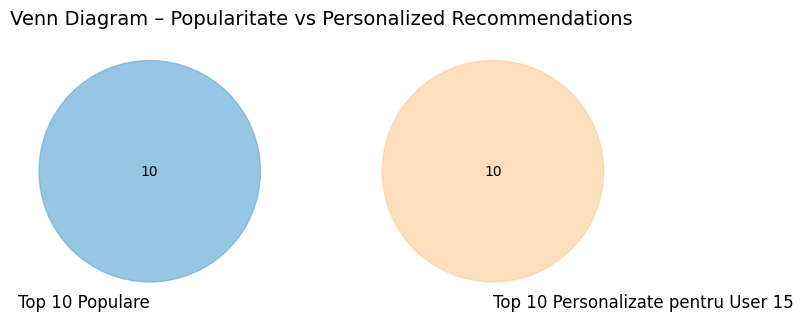

In [ ]:
plt.figure(figsize=(8, 8))
v = venn2(
    subsets=(set_popular, set_personalized),
    set_labels=("Top 10 Populare", f"Top 10 Personalizate pentru User {user_id}")
)

# Colorăm DOAR patch-urile care există
for patch_id, color in [('10', '#6baed6'),   # popular only
                        ('01', '#fdd0a2'),   # personalized only
                        ('11', '#31a354')]:  # intersectie
    patch = v.get_patch_by_id(patch_id)
    if patch:
        patch.set_color(color)
        patch.set_alpha(0.7)

plt.title("Venn Diagram – Popularitate vs Personalized Recommendations", fontsize=14)
plt.show()


## Etapa 2.7 – Comparație între Content-Based și Collaborative Filtering

În această etapă analizăm diferențele dintre cele două paradigme majore de recomandare, aplicate asupra aceleiași piese („Tadow”), pentru a evidenția modul distinct în care acestea formulează sugestii muzicale.

- Content-Based Filtering

    - Acest model recomandă melodii care prezintă caracteristici audio similare, precum energie, valence, tempo, gen sau alte atribute muzicale.
    - Algoritmul se bazează exclusiv pe descrierea pieselor și nu ia în considerare comportamentul altor utilizatori.

- Collaborative Filtering

    - Acest model identifică recomandări plecând de la comportamentul agregat al utilizatorilor.
    - Melodiile sunt sugerate în funcție de preferințele altor utilizatori care au ascultat și apreciat aceeași piesă, modelul extrăgând factori latenți și tipare colective din datele de ascultare.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

song_to_compare = "Tadow"

# =========================================================
# 1. RECOMANDĂRI CONTENT-BASED — cu similarități
# =========================================================

cb_raw = recommend_content_based_table(song_to_compare, sim_matrix, top_n=10)

cb_recs = cb_raw[['track_name', 'similarity']].copy()
cb_recs['type'] = 'Content-Based'
cb_recs = cb_recs[['track_name', 'type', 'similarity']]


# =========================================================
# 2. RECOMANDĂRI COLLABORATIVE (SVD) — cu similarități
# =========================================================

user_id = 15
scores = R_pred[user_item_matrix.index.get_loc(user_id)]
sorted_idx = np.argsort(scores)[::-1]

cf_rows = []
count = 0
for pos in sorted_idx:
    song_id = user_item_matrix.columns[pos]

    if song_id in ratings_df[ratings_df['user_id'] == user_id]['song_id'].values:
        continue  # ignorăm melodiile deja ascultate

    track = songs_sample.loc[song_id]['track_name']
    score = float(scores[pos])

    cf_rows.append([track, "Collaborative", score])
    count += 1
    if count == 10:
        break

cf_recs = pd.DataFrame(cf_rows, columns=["track_name", "type", "similarity"])


# =========================================================
# 3. AFIȘARE SIDE-BY-SIDE (2 tabele)
# =========================================================

def display_side_by_side(dfs:list, titles:list):
    html = ""
    for df, title in zip(dfs, titles):
        html += f"<div style='float:left; margin-right:40px'><h3>{title}</h3>{df.to_html(index=False)}</div>"
    display_html(html, raw=True)

display_side_by_side(
    [cb_recs, cf_recs],
    ["Content-Based Recommendations", "Collaborative (SVD) Recommendations"]
)


track_name,type,similarity
Even When It Hurts (feat. Hillsong United & Samuel Nuñez),Content-Based,1.000
Sorry,Content-Based,0.998
Euromillón,Content-Based,0.994
Bubbly,Content-Based,0.994
Bubbly,Content-Based,0.994
Who Hurt You?,Content-Based,0.994
Llegaste Tú,Content-Based,0.992
Drive,Content-Based,0.992
Coming Back - Maya Jane Coles Remix,Content-Based,0.991
Stupid In Love,Content-Based,0.991


#  ETAPA 3 – NEURAL / CONTEXTUAL (EPOCA MODERNĂ)
Ideea de bază

Sistemele moderne de recomandare nu se mai limitează la a compara melodii pe baza unor atribute explicite, ci învață direct din contextul în care apar piesele (playlisturi, sesiuni, ordinea temporală). Acest lucru permite descoperirea automată a unor relații subtile între melodii — exact cum funcționează recomandările din Spotify, YouTube sau TikTok.

<br>

În această etapă explorăm două moduri diferite de a construi modele contextuale:

1. Word2Vec pe playlisturi simulate (corpus generat random)

playlisturile sunt tratate ca „fraze”, iar melodiile ca „cuvinte”

modelul învață ce melodii apar împreună în contexte artificiale

scopul este să vedem dacă relațiile învățate sunt coerente în ciuda datelor sintetice

2. Word2Vec pe playlisturi tematice pe genuri (corpus ordonat semantic)

fiecare playlist reprezintă un gen (pop, rock, rap, latin, r&b, edm)

structura este mult mai organizată, iar modelul învață relații reale între genuri și melodii

putem compara rezultatele cu primul model pentru a observa diferențele.

</br>
Cele două modele Word2Vec au deci corpusuri diferite iar acest lucru ne ajută să analizăm cum influențează structura datelor calitatea recomandărilor.


### 3.1 Simularea playlisturilor (date contextuale)
În primul pas pregătim date contextuale pentru Word2Vec. Ideea centrală este tratarea fiecărui playlist ca pe o „fraza” formată din melodii, similar modului în care în NLP se procesează secvențe de cuvinte.

Aceste playlisturi simulează situații reale: melodii ascultate împreună într-o sesiune, într-o stare emoțională, într-un vibe anume etc.

Pentru simularea playlisturilor aplicăm filtre care reflectă criterii reale de organizare:

- energie

- valență (mood)

- danceability

- tempo

- gen muzical

Funcția generate_playlist() aplică aceste filtre și returnează un set coerent de melodii, formând un playlist contextual.

In [ ]:
# functie pentru generare de playlist-uri pe baza de vibe/context
def generate_playlist(df,
                      genre=None,
                      min_dance=None,
                      max_dance=None,
                      energy_range=None,
                      valence_range=None,
                      tempo_range=None,
                      limit=15):

    playlist = df.copy()

    if genre:
        playlist = playlist[playlist["playlist_genre"] == genre]

    if min_dance is not None:
        playlist = playlist[playlist["danceability"] >= min_dance]

    if max_dance is not None:
        playlist = playlist[playlist["danceability"] <= max_dance]

    if energy_range:
        low, high = energy_range
        playlist = playlist[
            (playlist["energy"] >= low) & (playlist["energy"] <= high)
        ]

    if valence_range:
        low, high = valence_range
        playlist = playlist[
            (playlist["valence"] >= low) & (playlist["valence"] <= high)
        ]

    if tempo_range:
        low, high = tempo_range
        playlist = playlist[
            (playlist["tempo"] >= low) & (playlist["tempo"] <= high)
        ]

    tracks = playlist["track_name"].dropna().unique().tolist()

    return tracks[:limit]


### Generarea automată a playlisturilor contextuale (Corpusul 1 pentru Word2Vec)

În această etapă construim un prim tip de corpus pentru Word2Vec, bazat pe playlisturi simulate. Ideea este să generăm liste de melodii care par a fi ascultate împreună într-un anumit vibe, folosind condiții aleatorii pentru energie, valență, tempo și danceability.

Acest corpus ne ajută să analizăm cum funcționează Word2Vec atunci când datele nu sunt structurate perfect, ci sunt mixturi random de melodii — similar playlisturilor haotice create de utilizatori în viața reală.

Pentru fiecare playlist:

- intervalele pentru energie și valență sunt alese aleator, sugerând stări diferite (party, chill, workout)

- numărul de melodii este între 25 și 30

- genul muzical este lăsat liber → playlisturi mixte

- rezultatul imită modul în care Spotify modelează secvențele de ascultare

Playlisturile generate astfel devin primul corpus Word2Vec și ne vor permite mai târziu să comparăm ce învață modelul față de un corpus mai structurat (cel pe genuri din secțiunea următoare).


In [ ]:
# === Generare 7 playlisturi contextuale (25–30 melodii fiecare) ===
import random
contextual_playlists = []

for i in range(7):
    playlist = generate_playlist(
        df,                                 # datasetul deja încărcat
        genre=None,                          # lăsăm genul liber → playlisturi mixte
        min_dance=round(random.uniform(0.2, 0.8), 2),
        energy_range=(
            round(random.uniform(0.2, 0.7), 2),
            round(random.uniform(0.7, 1.0), 2)
        ),
        valence_range=(
            round(random.uniform(0.1, 0.5), 2),
            round(random.uniform(0.5, 0.9), 2)
        ),
        limit=random.randint(25, 30)         # intre 25 si 30 melodii
    )
    contextual_playlists.append(playlist)

print(f"Am generat {len(contextual_playlists)} playlisturi contextuale.")
for idx, pl in enumerate(contextual_playlists, 1):
    print(f"\nPlaylist {idx} — {len(pl)} melodii")
    print(pl[:10], "...")


Am generat 7 playlisturi contextuale.

Playlist 1 — 25 melodii
['Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & Steve Remix', 'Hold Me While You Wait - Steve Void Remix', 'Signs - Eden Prince Remix', "Good Things Fall Apart (with Jon Bellion) [Tiësto's Big Room Remix]", 'Heaven Can Wait - The Aston Shuffle Remix', 'joy. (R3HAB Remix)', 'Loco Contigo (with J. Balvin & Tyga) - Cedric Gervais Remix', 'With You - Dexter Remix', "Beautiful (feat. Camila Cabello) - Bazzi vs. EDX's Ibiza Sunrise Remix", "Don't Leave Me Lonely (feat. Yebba) - Claptone Remix"] ...

Playlist 2 — 25 melodii
["I Don't Care (with Justin Bieber) - Loud Luxury Remix", 'Memories - Dillon Francis Remix', 'All the Time - Don Diablo Remix', 'Call You Mine - Keanu Silva Remix', 'Someone You Loved - Future Humans Remix', 'Beautiful People (feat. Khalid) - Jack Wins Remix', 'Never Really Over - R3HAB Remix', 'Post Malone (feat. RANI) - GATTÜSO Remix', 'Tough Love - Tiësto Remix / Radio Edit', "If I Can't Have You - Gry

## 3.2 Antrenarea modelului Word2Vec (Item2Vec)

Având acum primul nostru corpus de playlisturi simulate, putem folosi Word2Vec pentru a învăța relații contextuale între melodii. În acest model, tratăm:

- melodia = cuvânt,

- playlistul = propoziție.

Astfel, Word2Vec învață vectori pentru melodii pe baza felului în care acestea apar împreună în playlisturi — exact cum în NLP cuvintele apropiate semantic apar în contexte similare.

Modelul ar trebui să surprindă:

- stilul și vibe-ul melodiilor,

- asemănări energetice și emoționale,

- co-apariții recurente,

- compatibilități subtile între piese.

Acest prim model este antrenat exclusiv pe playlisturi mixte și generate random, ceea ce înseamnă că învățarea contextelor este mai slabă și mai variabilă. Tocmai de aceea calitatea recomandărilor va fi bună, dar nu excelentă — fiind un punct de comparație ideal cu modelul antrenat mai târziu pe playlisturi organizate strict pe genuri.

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

### 3.2.1 Antrenarea Word2Vec pe playlisturile simulate

Modelul primește playlisturile generate anterior și învață embedding-uri pe baza lor.

Parametri importanți:
- `vector_size=128` – dimensiunea vectorului pentru fiecare melodie
- `window=5` – câte melodii din jur contează ca fiind „context”
- `sg=1` – skip-gram (mai bun pentru recomandări)
- `epochs=20` – antrenare cu 20 de treceri

După antrenare, putem cere modelului recomandări de „melodii similare”, exact ca pe platformele moderne de streaming.

In [ ]:
# === Antrenare model Word2Vec pe playlisturile simulate ===

model = Word2Vec(
    sentences=contextual_playlists,   # playlisturile generate mai sus
    vector_size=128,                  # dimensiunea embeddingului
    window=5,                         # cât de mare e contextul (cum „vezi” vecinii)
    min_count=1,                      # păstrăm toate melodiile
    sg=1,                             # skip-gram (mai bun pentru recomandări)
    workers=4,                        # multi-threading
    epochs=20                         # câte treceri peste date
)

print("Modelul Word2Vec a fost antrenat cu succes!")


Modelul Word2Vec a fost antrenat cu succes!


### Recomandări de melodii folosind Word2Vec

În această secțiune testăm dacă modelul a învățat relații coerente. Alegem o melodie din primul playlist și folosim funcția ```most_similar()``` pentru a vedea ce piese apar în contexte apropiate.

Din moment ce playlisturile sunt random și mixte, recomandările pot fi:

- destul de bune, dar nu extrem de precise,

- influențate de combinațiile aleatorii din playlisturi,

- utile ca „baseline”, pentru a arăta cum se schimbă rezultatele când trecem la corpusul organizat pe genuri.

Acest lucru ne pregătește pentru următorul pas: antrenarea unui model Word2Vec mult mai structurat, bazat doar pe playlisturi curate, împărțite pe genuri – unde embedding-urile vor fi mai precise și rezultatele mai intuitive.

In [ ]:
song = contextual_playlists[0][0]    # prima melodie din primul playlist
print(f"Recomandări pentru: {song}\n")
model.wv.most_similar(song, topn=10)


Recomandări pentru: Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & Steve Remix



[('Happy Now', 0.4456796646118164),
 ('Winter Hitori feat. ASOBOiSM', 0.37493565678596497),
 ('Ruin My Life', 0.3398800790309906),
 ("Beautiful (feat. Camila Cabello) - Bazzi vs. EDX's Ibiza Sunrise Remix",
  0.33867162466049194),
 ('Better With You', 0.33656808733940125),
 ('Wherever You Go', 0.3259376287460327),
 ('Lovers + Strangers - GATTÜSO Remix', 0.3076724112033844),
 ('Stay', 0.3010897636413574),
 ('Only When It Rains', 0.27382123470306396),
 ('IDGAF - Hazers Remix', 0.27213379740715027)]

### Folosirea genurilor reale din dataset

După antrenarea primului model Word2Vec pe playlisturi generate aleator, am observat că recomandările sunt coerente, dar încă destul de variabile — lucru normal, pentru că playlisturile mixte combină piese din stiluri foarte diferite.
Pentru a obține un corpus mai curat și mai bine structurat, extragem acum genurile reale din dataset și le folosim pentru a genera playlisturi dedicate fiecărui gen muzical.

Această structurare ne permite să construim un al doilea model Word2Vec, care învață relațiile dintre melodii într-un mod mult mai stabil.

In [ ]:
df["playlist_genre"].dropna().unique()


array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

### Generare playlisturi condiționate strict pe gen ( Corpusul 2 pentru Word2Vec)

În această etapă generăm câte un playlist pentru fiecare gen muzical (pop, rap, rock, latin, r&b, edm).
Spre deosebire de playlisturile random din primul corpus, aici fiecare playlist este format doar din melodii ale aceluiași gen, filtrate suplimentar după:

- energie,

- valence (mood),

- danceability,

- tempo.

Fiecare playlist conține exact 25 melodii reprezentative pentru acel gen, formând un set de date tematic ideal pentru un al doilea model Word2Vec.

De ce facem asta?
Pentru a compara două moduri diferite de antrenare:

- Model 1: playlisturi mixte → învață compatibilități generale
- Model 2: playlisturi pe gen → învață compatibilități specifice fiecărui stil muzical

Diferența dintre recomandările celor două modele ne arată cât de mult contează structura corpusului în calitatea embedding-urilor.

Playlisturile create aici vor servi drept corpus pentru al doilea model Word2Vec, care învață explicit relațiile între GENURI — nu doar între melodii.

In [ ]:
# === Generăm playlisturi pe gen SPECIFIC pentru testare ===

genres = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

genre_playlists = []

for g in genres:
    pl = generate_playlist(
        df,
        genre=g,                     # forțăm genul!
        min_dance=0.3,
        energy_range=(0.2, 1.0),
        valence_range=(0.1, 0.9),
        limit=25                     # 25 melodii per playlist
    )

    # punem tokenul de gen la început
    playlist_with_genre = [g] + pl

    genre_playlists.append(playlist_with_genre)
    print(f"✔ Playlist generat pentru genul {g}: {len(pl)} melodii")

print("\nToate playlisturile au fost generate!")


✔ Playlist generat pentru genul pop: 25 melodii
✔ Playlist generat pentru genul rap: 25 melodii
✔ Playlist generat pentru genul rock: 25 melodii
✔ Playlist generat pentru genul latin: 25 melodii
✔ Playlist generat pentru genul r&b: 25 melodii
✔ Playlist generat pentru genul edm: 25 melodii

Toate playlisturile au fost generate!


### Model Word2Vec bazat pe playlisturi grupate pe gen
După antrenarea primului Word2Vec pe playlisturi mixte (corpus general), construim un al doilea model folosind playlisturile curate, grupate strict pe gen (pop, rap, rock, latin, r&b, edm).

În acest corpus structurat, fiecare playlist reprezintă aproximativ 25 de melodii reprezentative pentru un singur gen, iar ordinea pieselor surprinde modul în care acestea apar împreună în contextul unui stil muzical bine definit.

Acest al doilea model nu învață doar relații între melodii, ci și relații semantice între genuri, deoarece vocabularul conține atât numele genurilor, cât și piesele care le aparțin.

Astfel, modelul poate identifica:

- ce melodii sunt cele mai strâns asociate cu un gen;

- ce melodii sunt compatibile cu combinații de genuri (ex. pop + rock);

- ce genuri apar des împreună în playlisturi tematice.

Aceasta oferă o înțelegere mai fină a compatibilităților stilistice și permite recomandări care merg dincolo de asemănarea numerică a pieselor.


In [ ]:
model2 = Word2Vec(
    sentences=genre_playlists,
    vector_size=100,
    window=5,
    sg=1,
    min_count=1,
    epochs=20
)

print("Model Word2Vec antrenat pe playlisturile de gen!")


Model Word2Vec antrenat pe playlisturile de gen!


In [ ]:
model2.wv.most_similar(positive=["pop", "rock"], topn=10)


[('Slow Dance (feat. Ava Max) - Sam Feldt Remix', 0.31859293580055237),
 ('Bandit (with YoungBoy Never Broke Again)', 0.2675122022628784),
 ('Hot (Remix) [feat. Gunna and Travis Scott]', 0.26193827390670776),
 ('What to Do', 0.2409943789243698),
 ('Electric Feel (Kygo Remix)', 0.230488583445549),
 ('edm', 0.2286297231912613),
 ('ROXANNE', 0.1936596930027008),
 ('Someone You Loved - Future Humans Remix', 0.18858668208122253),
 ('Shadow Of Your Love', 0.18529576063156128),
 ('Out Ta Get Me', 0.18432718515396118)]

### Recomandări de gen pe baza unor combinații preferate

În mod natural, Word2Vec returnează atât melodii, cât și genuri în lista de similitudini.
Pentru a face recomandări strict pe gen, avem nevoie de o funcție de filtrare care extrage doar tokenii ce reprezintă genuri reale.

Funcția ```recommend_genre()```:

- ia similaritățile brute din Word2Vec pentru o combinație de genuri (ex: ["pop", "rock"]);

- păstrează doar acei tokeni care sunt efectiv genuri;

- sortează genurile în funcție de compatibilitatea cu combinația dată.

Practic, funcția ne arată:

- ce genuri sunt cel mai aproape semantic de combinația introdusă;

- ce genuri sunt compatibile cu vibrația rezultată din cele două;

- ce genuri sunt “departe” (scor negativ), indicând ce stiluri nu se potrivesc cu acea combinație.

Acest pas transformă Word2Vec într-un instrument util nu doar pentru melodii, ci și pentru analiza relațiilor dintre genuri — o perspectivă foarte apropiată de modul în care platforme precum Spotify înțeleg gusturile utilizatorilor.

In [ ]:
# Lista genurilor reale
genres = ["pop", "rap", "rock", "latin", "r&b", "edm"]

def recommend_genre(model, positive, topn=5):
    # obținem toate recomandările brute
    all_sim = model.wv.most_similar(positive=positive, topn=200)
    # păstrăm doar genurile
    filtered = [(w, score) for w, score in all_sim if w in genres]
    return filtered[:topn]

# Test: Pop + Rock → ce genuri recomandă?
print("Recomandări de gen pentru combinația Pop + Rock:")
print(recommend_genre(model2, positive=["pop", "rock"], topn=5))


Recomandări de gen pentru combinația Pop + Rock:
[('edm', 0.2286297231912613), ('latin', 0.13091003894805908), ('r&b', -0.006529803853482008), ('rap', -0.14272327721118927)]


### Vizualizarea recomandărilor de gen (bar chart)

Pentru a interpreta mai ușor relațiile învățate de modelul Word2Vec, vizualizăm scorurile de similaritate dintre genuri folosind un grafic bară. Astfel putem observa într-un mod intuitiv care genuri sunt compatibile cu o anumită combinație de interese — în exemplul nostru, Pop + Rock.

Barelor pozitive (roz) indică genurile care sunt cel mai apropiate semantic de combinația dată și care, în consecință, sunt recomandate de model. Barele negative (mov închis) indică genuri care nu se potrivesc cu acest profil, modelul sugerând că apar rar în aceleași contexte muzicale.

Pentru genurile recomandate, etichetăm barele cu „Rank 1”, „Rank 2” etc., în funcție de cât de puternică este asocierea.
Această vizualizare oferă o imagine clară asupra modului în care modelul percepe compatibilitatea stilistică dintre genuri și evidențiază structura semantică pe care Word2Vec o descoperă în dataset.

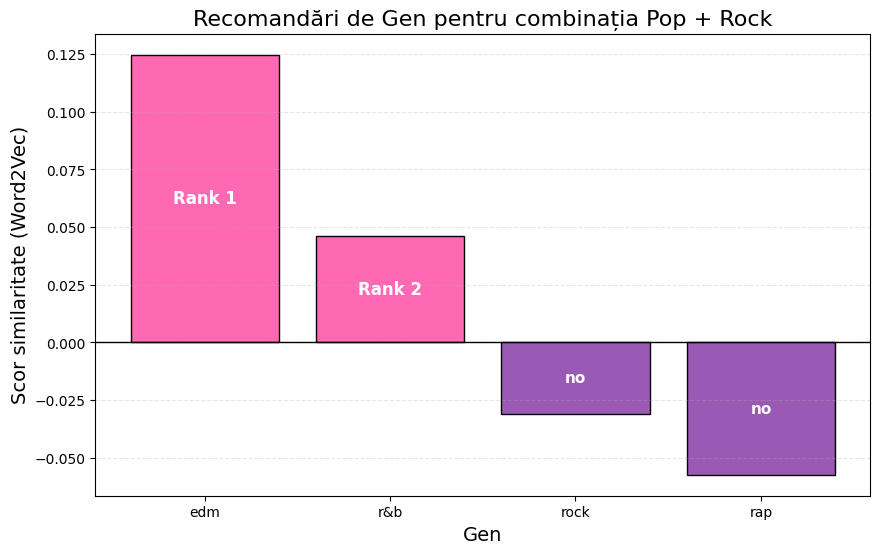

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# === Obținem recomandările (lista de tupluri) ===
results = recommend_genre(model2, positive=["latin", "pop"], topn=5)

# Dacă nu există rezultate
if len(results) == 0:
    print("Nu există genuri recomandate în vocabular.")
else:
    # Genuri & scoruri separate
    genres_out = [g for g, s in results]
    scores_out = [s for g, s in results]

    # Culori: roz = pozitiv, mov = negativ
    colors = ['#ff69b4' if s > 0 else '#9b59b6' for s in scores_out]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(genres_out, scores_out, color=colors, edgecolor="black")

    # Linie 0
    plt.axhline(0, color='black', linewidth=1)

    # Calculăm rank doar pentru scorurile pozitive
    positive_sorted = sorted(
        [(g, s) for g, s in zip(genres_out, scores_out) if s > 0],
        key=lambda x: x[1],
        reverse=True
    )

    # Mapăm gen -> rank
    rank_map = {g: i+1 for i, (g, _) in enumerate(positive_sorted)}

    # Adăugăm RANK în interiorul barii
    for bar, g, s in zip(bars, genres_out, scores_out):
        if s > 0:  # bară pozitivă → rank în interior
            plt.text(
                bar.get_x() + bar.get_width()/2,
                s/2,
                f"Rank {rank_map[g]}",
                ha='center', va='center',
                fontsize=12, fontweight="bold",
                color='white'
            )
        else:  # bară negativă → text în interiorul părții negative
            plt.text(
                bar.get_x() + bar.get_width()/2,
                s/2,
                "no",
                ha='center', va='center',
                fontsize=11, fontweight="bold",
                color='white'
            )

    # Titlu & labels
    plt.title("Recomandări de Gen pentru combinația Pop + Rock", fontsize=16)
    plt.xlabel("Gen", fontsize=14)
    plt.ylabel("Scor similaritate (Word2Vec)", fontsize=14)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()


## 3.3 Vizualizarea avansată a spațiului semantic al melodiilor (t-SNE + Word2Vec)

În această secțiune analizăm vizual modul în care modelul Word2Vec a învățat relațiile dintre melodii pe baza contextului în care apar în playlisturile generate.

Modelul Word2Vec construiește un spațiu vectorial semantic, în care:

- melodiile care au vibe / energie / stil asemănător ajung în zone apropiate,

- melodiile foarte diferite apar în regiuni îndepărtate.

Pentru a putea observa aceste relații într-un mod intuitiv, reducem dimensionalitatea embedding-urilor învățate (de la 128 dimensiuni → la 2 dimensiuni) folosind algoritmul t-SNE.
t-SNE comprimă spațiul păstrând structura locală a datelor și permite o reprezentare vizuală clară a „hărții” relațiilor dintre melodii.

Rezultatul final este o hartă semantică 2D, în care fiecare punct reprezintă o melodie iar poziționarea ei reflectă similaritățile învățate de model pe baza contextelor muzicale.



In [ ]:
from sklearn.manifold import TSNE
import pandas as pd

# 1. extragem embeddingurile din model
all_songs = list(model.wv.index_to_key)
embeddings = np.array([model.wv[s] for s in all_songs])

# 2. rulăm t-SNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_coords = tsne.fit_transform(embeddings)

# 3. construim un dict melodie -> gen real din dataframe
genre_map = dict(zip(df['track_name'], df['playlist_genre']))

# 4. construim DataFrame pentru vizualizare folosind genurile reale
vis_df = pd.DataFrame({
    'song': all_songs,
    'x': tsne_coords[:, 0],
    'y': tsne_coords[:, 1],
    'playlist_genre': [genre_map.get(s, "unknown") for s in all_songs]
})


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22826 (\N{CJK UNIFIED IDEOGRAPH-592A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


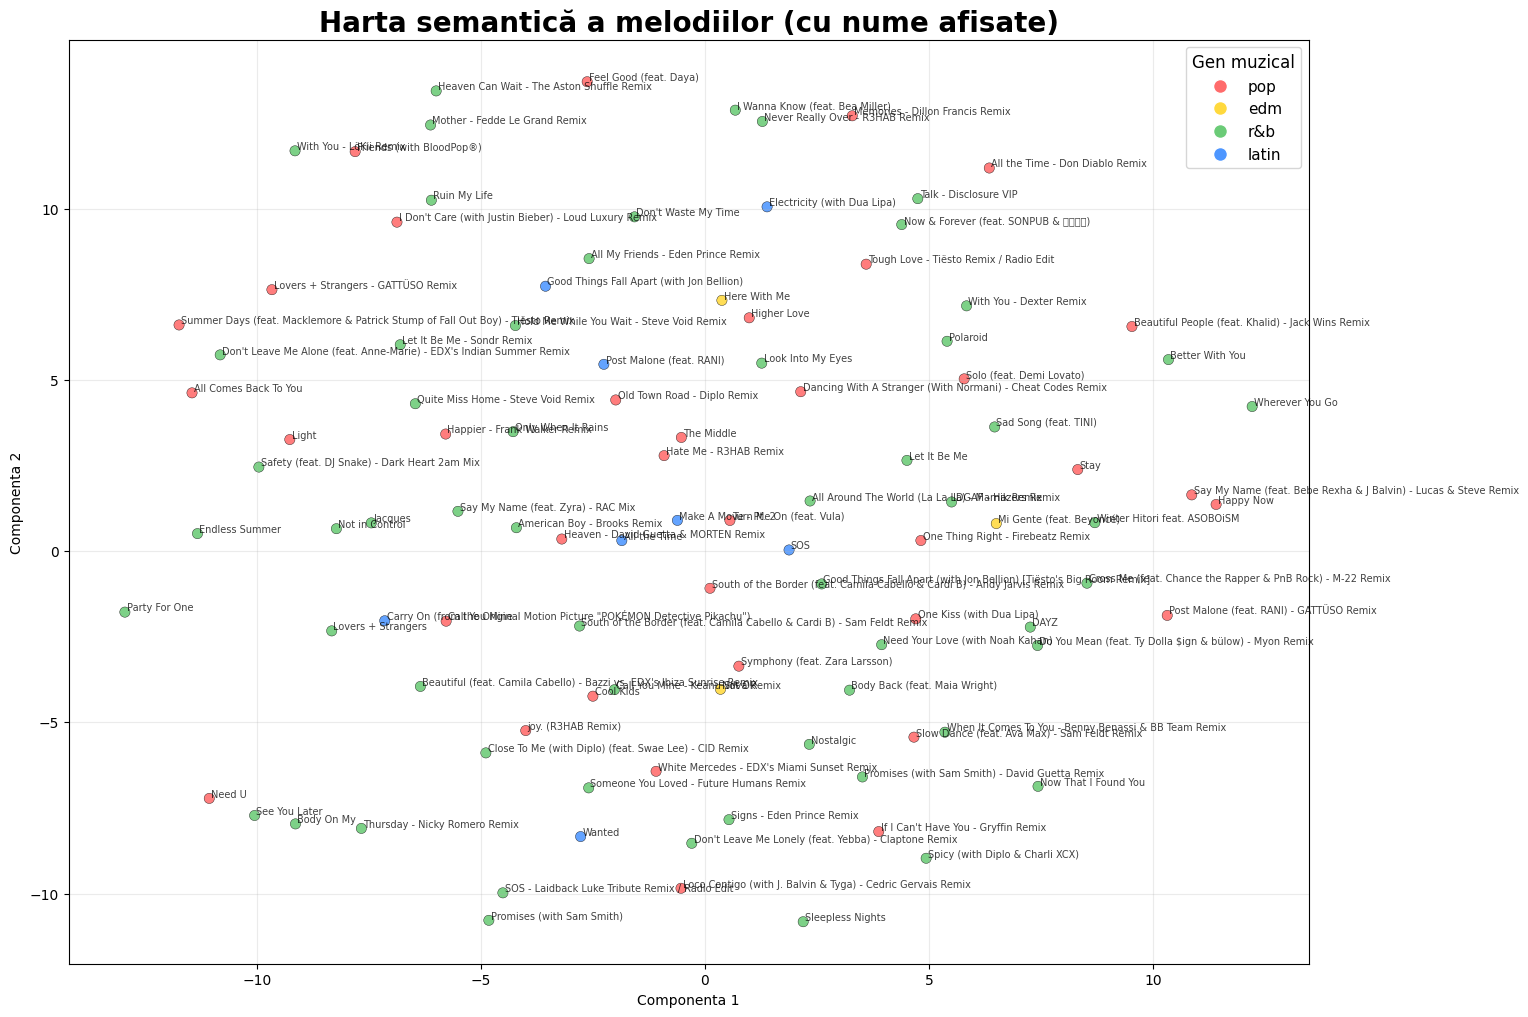

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# paletă vibrantă custom pentru genuri
vibrant_palette = [
    "#FF6B6B",  # coral red
    "#FFD93D",  # vibrant yellow
    "#6BCB77",  # lime green
    "#4D96FF",  # strong blue
    "#9D4EDD",  # neon purple
    "#FF924C",  # orange
    "#36CFC9",  # turquoise
    "#C77DFF",  # lavender
    "#F72585",  # pink fuchsia
    "#3A0CA3"   # deep indigo
]

# mapăm codurile genurilor la paleta vibrantă
genre_codes = vis_df['playlist_genre'].astype('category').cat.codes
num_genres = len(vis_df['playlist_genre'].unique())

color_map = [vibrant_palette[i % len(vibrant_palette)] for i in genre_codes]

# === Harta Semantică ===
plt.figure(figsize=(16, 12))

scatter = plt.scatter(
    vis_df['x'], vis_df['y'],
    c=color_map,
    s=55, alpha=0.88, edgecolors='black', linewidth=0.3
)

# numele melodiilor
for i, row in vis_df.iterrows():
    plt.text(
        row['x'] + 0.04, row['y'] + 0.04,
        row['song'],
        fontsize=7, alpha=0.75
    )

plt.title("Harta semantică a melodiilor (cu nume afisate)", fontsize=20, weight="bold")
plt.xlabel("Componenta 1")
plt.ylabel("Componenta 2")


# legendă
handles = []
labels = vis_df['playlist_genre'].unique()

for i, label in enumerate(labels):
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                              label=label,
                              markerfacecolor=vibrant_palette[i % len(vibrant_palette)],
                              markersize=10))

plt.legend(handles=handles, title="Gen muzical", fontsize=11, title_fontsize=12,
           loc='upper right', frameon=True)

plt.grid(alpha=0.25)
plt.show()


### Interpretarea hărții semantice

Harta semantică ilustrează felul în care modelul Word2Vec percepe asemănarea dintre melodii.

- Puncte apropiate → melodii similare ca vibe, energie, ritm sau structură.
- Puncte îndepărtate → melodii care apar în contexte foarte diferite.
- Culorile arată genurile reale → putem observa zone în care pop, latin sau r&b
  se suprapun sau se separă.
- Etichetele cu numele melodiilor confirmă faptul că modelul a poziționat
  corect melodii cu caracteristici comune în apropiere.

Astfel, această vizualizare demonstrează că embedding-urile Word2Vec captează
relații muzicale profunde, similare cu cele folosite în sistemele moderne
de recomandare precum Spotify sau YouTube Music.


## 3.4 Tranziție semantică între genuri (cu artiști)

În această secțiune construim o tranziție muzicală între două genuri,
de exemplu „Pop → Rock”, folosind embeddingurile Word2Vec.
Pentru fiecare melodie generată în tranziție afișăm atât titlul, cât și
artistul, astfel încât playlistul rezultat să fie ușor de înțeles și posibil
de ascultat.

Fiecare melodie este inclusă cu formatul:

`Titlu — Artist`

Acest lucru permite interpretarea clară a vibrației fiecărei etape
în drumul semantic dintre cele două genuri.

---

## Vizualizarea tranziției semantice pe harta t-SNE

Pentru a înțelege vizual modul în care modelul Word2Vec construiește o tranziție
între două genuri muzicale (ex: Pop → Rock), vom desena traseul acestei tranziții
direct pe harta semantică t-SNE generată anterior.

Fiecare melodie este un punct în spațiul semantic, iar melodiile din tranziția
Pop → Rock vor apărea ca o secvență de puncte conectate printr-o linie.
Astfel, putem vedea efectiv „drumul muzical” pe care îl recomandă modelul:

- unde începe (genul de plecare),
- ce melodii intermediare folosește,
- cum se deplasează în spațiu,
- unde ajunge (genul țintă).

Această vizualizare arată clar cum modelul înțelege relațiile dintre genuri
și cum recomandă melodii treptate pentru a face o tranziție naturală.



⚠️ Genul rap are prea puține melodii distincte.

🎧 pop → Melodie reprezentativă:
   Wherever You Go — Unknown Artist

🎸 rap → Melodie reprezentativă:
   Turn Me On (feat. Vula) — Unknown Artist


=== Tranziție pop → rap ===

1. Wherever You Go — Unknown Artist
2. Better With You — Unknown Artist
3. Say My Name (feat. Bebe Rexha & J Balvin) - Lucas & Steve Remix — Unknown Artist
4. Dancing With A Stranger (With Normani) - Cheat Codes Remix — Unknown Artist
5. Winter Hitori feat. ASOBOiSM — Unknown Artist
6. Make A Move - Pt. 2 — Unknown Artist
7. Turn Me On (feat. Vula) — Unknown Artist


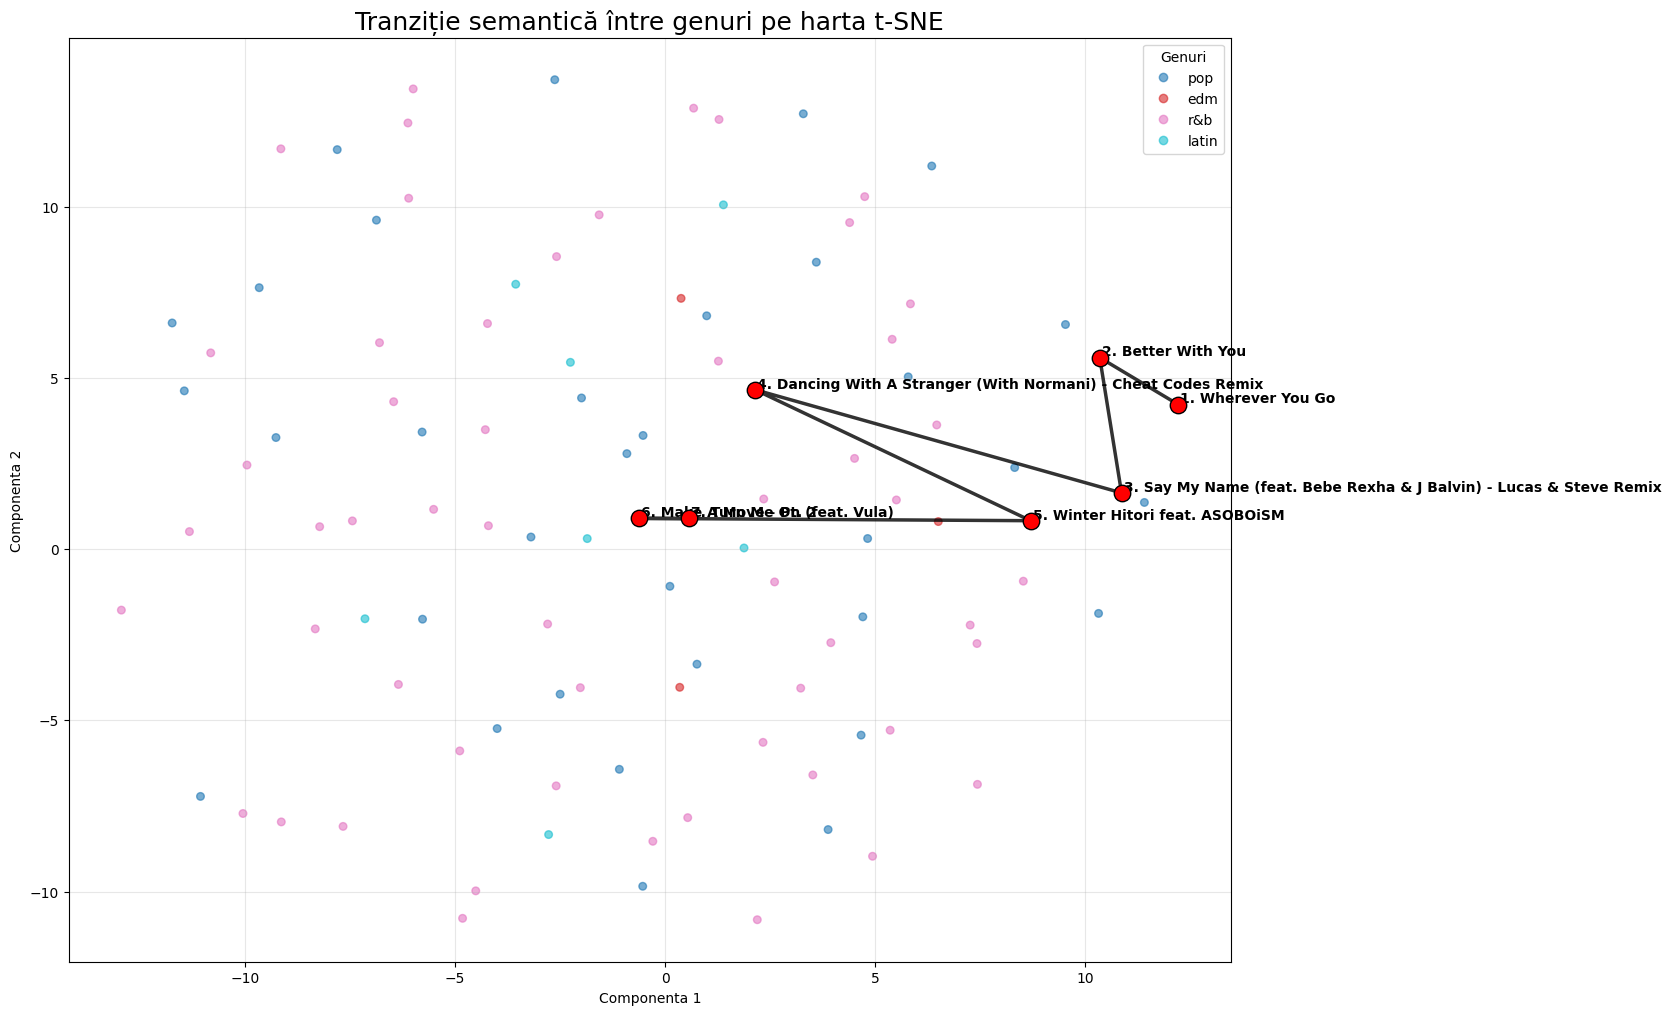

In [ ]:
# ============================================================
#     TRANZIȚIE SEMANTICĂ ÎNTRE GENURI - FĂRĂ NICIO REPETIȚIE
# ============================================================

import numpy as np
import random
import matplotlib.pyplot as plt

# -------------------------------------------
#  Helper: extrage artistul unei melodii
#  (din tabelul original songs_sample)
# -------------------------------------------
def get_artist(song):
    row = songs_sample[songs_sample['track_name'] == song]
    if len(row) > 0:
        return row.iloc[0]['track_artist']
    return "Unknown Artist"


# ---------------------------------------------------------
#  Alegem melodie reprezentativă pentru un GEN muzical
#  + evităm duplicatele cu ce urmează în tranziție
# ---------------------------------------------------------
def representative_song_for_gen(genre, forbidden=None):
    if forbidden is None:
        forbidden = set()

    # melodii din genul cerut, care există în vocab Word2Vec
    songs = vis_df[vis_df['playlist_genre'] == genre]['song'].tolist()
    songs = [s for s in songs if s in model.wv.key_to_index and s not in forbidden]

    # fallback: dacă genul are puține melodii distincte
    if len(songs) == 0:
        print(f"⚠️ Genul {genre} are prea puține melodii distincte.")
        songs = [s for s in vis_df['song'] if s in model.wv.key_to_index and s not in forbidden]

    return random.choice(songs)


# ---------------------------------------------------------
#     Tranziția semantică între două melodii (FĂRĂ duplicate)
# ---------------------------------------------------------
def semantic_transition(songA, songB, steps=5):
    vA, vB = model.wv[songA], model.wv[songB]
    direction = vB - vA

    playlist = [songA]
    used = set([songA])

    for i in range(1, steps + 1):
        point = vA + direction * (i / (steps + 1))
        nearest = model.wv.similar_by_vector(point, topn=50)

        chosen = None
        for cand, sc in nearest:
            if cand not in used and cand != songB:
                chosen = cand
                break

        if chosen:
            playlist.append(chosen)
            used.add(chosen)

    # adăugăm melodia finală NUMAI dacă nu există deja
    if songB not in used:
        playlist.append(songB)
        used.add(songB)

    return playlist


# ---------------------------------------------------------
#         Tranziție semantică între GENURI COMPLETĂ
# ---------------------------------------------------------
def genre_transition(genreA, genreB, steps=5):
    used_global = set()

    songA = representative_song_for_gen(genreA, forbidden=used_global)
    used_global.add(songA)

    songB = representative_song_for_gen(genreB, forbidden=used_global)
    used_global.add(songB)

    print(f"\n🎧 {genreA} → Melodie reprezentativă:")
    print(f"   {songA} — {get_artist(songA)}\n")

    print(f"🎸 {genreB} → Melodie reprezentativă:")
    print(f"   {songB} — {get_artist(songB)}\n")

    transition = semantic_transition(songA, songB, steps=steps)

    print(f"\n=== Tranziție {genreA} → {genreB} ===\n")
    for i, s in enumerate(transition):
        print(f"{i+1}. {s} — {get_artist(s)}")

    return transition


# ---------------------------------------------------------
#     Vizualizare t-SNE cu linia tranziției
# ---------------------------------------------------------
def plot_transition_on_tsne(transition_songs):
    plt.figure(figsize=(15, 12))

    scatter = plt.scatter(
        vis_df['x'], vis_df['y'],
        c=vis_df['playlist_genre'].astype('category').cat.codes,
        cmap='tab10', s=30, alpha=0.6
    )

    tx, ty = [], []
    for song in transition_songs:
        row = vis_df[vis_df['song'] == song]
        if len(row) > 0:
            tx.append(row['x'].iloc[0])
            ty.append(row['y'].iloc[0])

    # linia de tranziție
    plt.plot(tx, ty, color='black', linewidth=2.5, alpha=0.8)

    # marcăm punctele din tranziție
    for i, song in enumerate(transition_songs):
        row = vis_df[vis_df['song'] == song]
        if len(row) > 0:
            x, y = row['x'].iloc[0], row['y'].iloc[0]
            plt.scatter(x, y, color='red', s=140, edgecolor='black', zorder=5)
            plt.text(x + 0.05, y + 0.05, f"{i+1}. {song}", fontsize=10, weight='bold')

    plt.title("Tranziție semantică între genuri pe harta t-SNE", fontsize=18)
    plt.xlabel("Componenta 1")
    plt.ylabel("Componenta 2")

    handles, _ = scatter.legend_elements()
    plt.legend(handles, list(vis_df['playlist_genre'].unique()), title="Genuri")
    plt.grid(alpha=0.3)
    plt.show()


# ---------------------------------------------------------
#          EXEMPLU DE RULARE
# ---------------------------------------------------------
start_genre = "pop"
target_genre = "rap"

transition_playlist = genre_transition(start_genre, target_genre, steps=5)
plot_transition_on_tsne(transition_playlist)
